<a href="https://colab.research.google.com/github/Eduarram/ExData_Plotting1/blob/master/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis exploratorio de una serie de tiempo



In [468]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.distributions import chi2
from xgboost import XGBRegressor

### carga de datos


In [469]:
# datos de git hub
netf = pd.read_csv("https://raw.githubusercontent.com/Eduarram/time_series-/main1/proyecto%20netflix/BTC-USD.csv", index_col='Date')
netf.index = pd.to_datetime(netf.index, yearfirst=True)
bit_co = netf.asfreq('d')

In [470]:
netf.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-02-25  425.036987  427.718994  420.415009  424.544006  424.544006   
2016-02-26  424.628998  432.152008  421.619995  432.152008  432.152008   
2016-02-27  432.838989  434.230988  428.102997  432.519012  432.519012   
2016-02-28  432.571014  435.683014  423.820007  433.503998  433.503998   
2016-02-29  433.437988  441.506989  431.692993  437.696991  437.696991   

                Volume  
Date                    
2016-02-25  70798000.0  
2016-02-26  61486000.0  
2016-02-27  41893600.0  
2016-02-28  53033400.0  
2016-02-29  60694700.0

In [471]:
## retiramos las variables que no sirven
del netf['Open']
del netf['High']
del netf['Low']
del netf['Adj Close']


In [472]:
# conteo de los valores faltantes
netf.isnull().sum()

Close     2
Volume    2
dtype: int64

In [473]:
## relleno de los valores nulos
bit_co = bit_co.fillna(method = 'ffill')
bit_co.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [474]:
# medidas basicas
netf.describe()

Close        Volume
count   2556.000000  2.556000e+03
mean   15629.626034  1.986635e+10
std    16491.298665  2.020081e+10
min      400.570007  2.851400e+07
25%     3953.488587  3.375350e+09
50%     8936.844238  1.679401e+10
75%    20892.220703  3.113589e+10
max    67566.828125  3.509679e+11

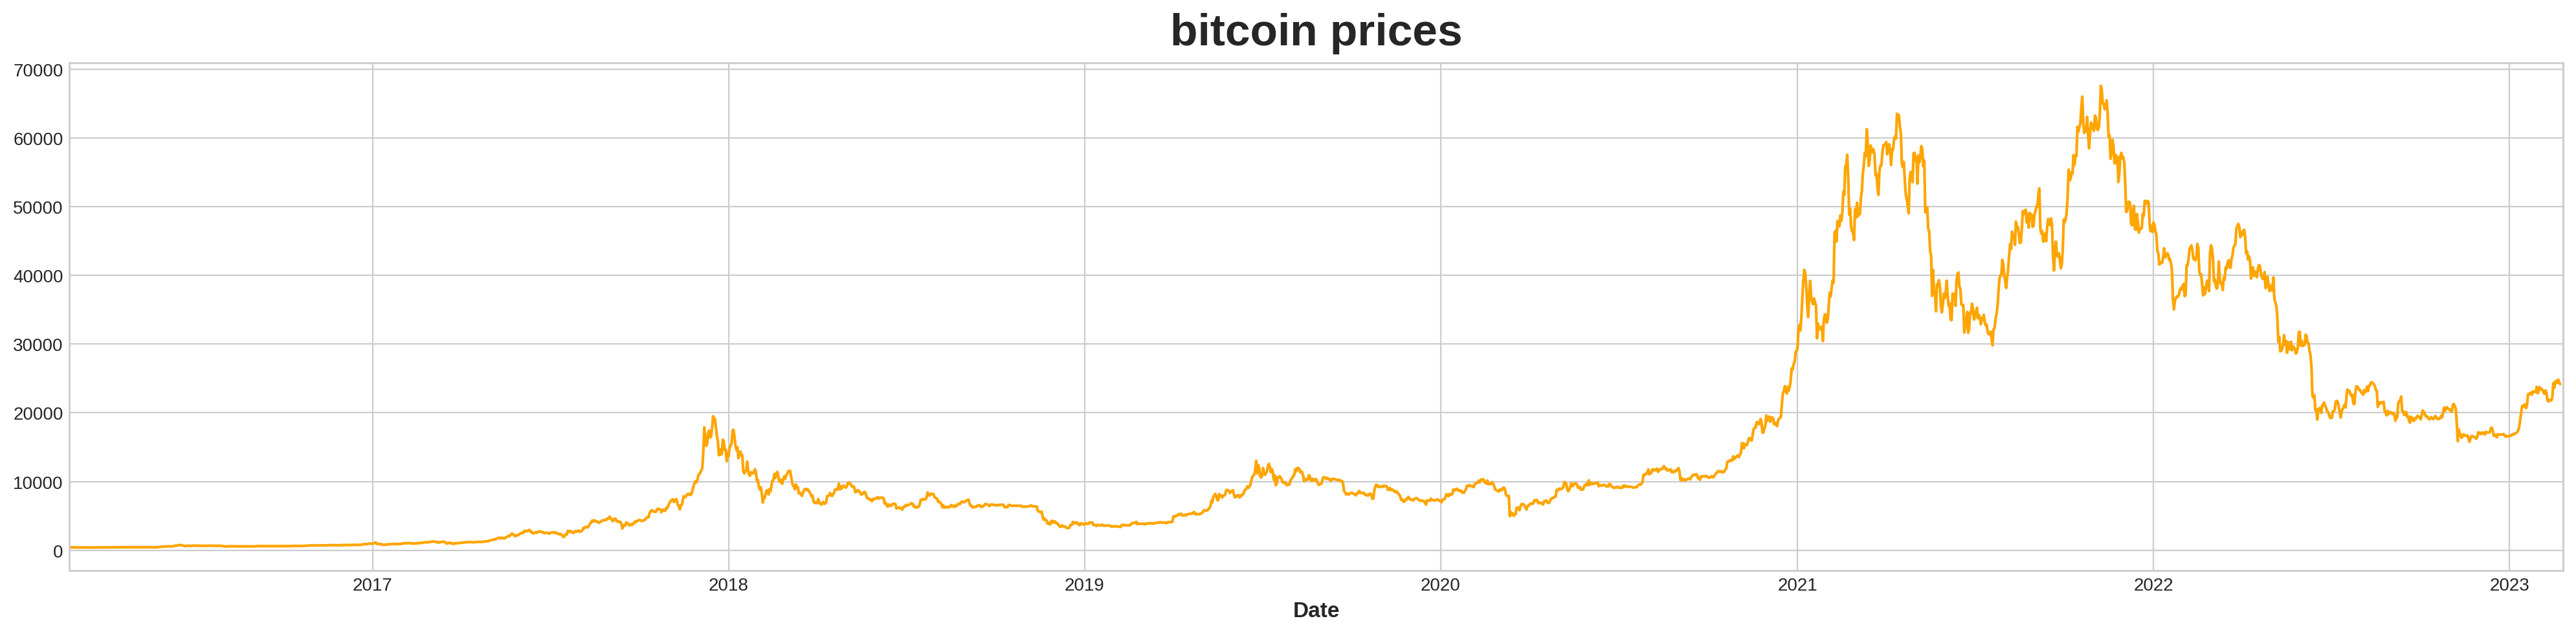

In [475]:
### visualizacion de datos
netf.Close.plot(figsize=(20, 5), color='orange')
plt.title('bitcoin prices', size = 25)
plt.show()

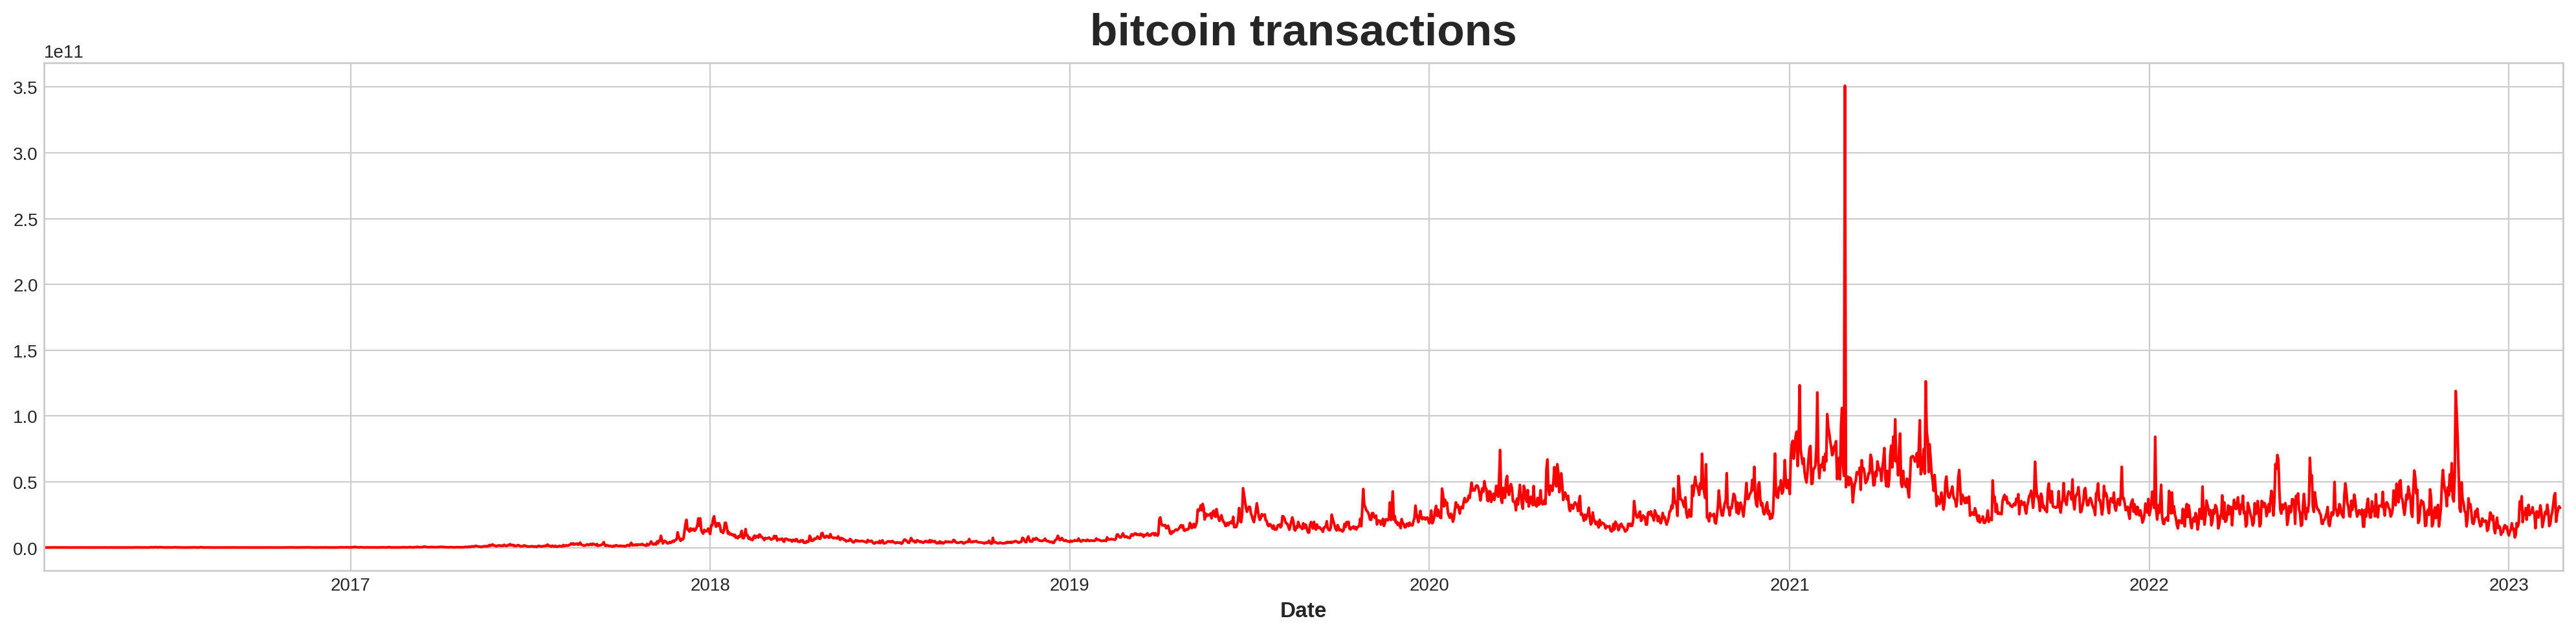

In [476]:
netf.Volume.plot(figsize=(20, 5), color='red')
plt.title('bitcoin transactions', size = 25)
plt.show()

<Axes: xlabel='Close', ylabel='Volume'>

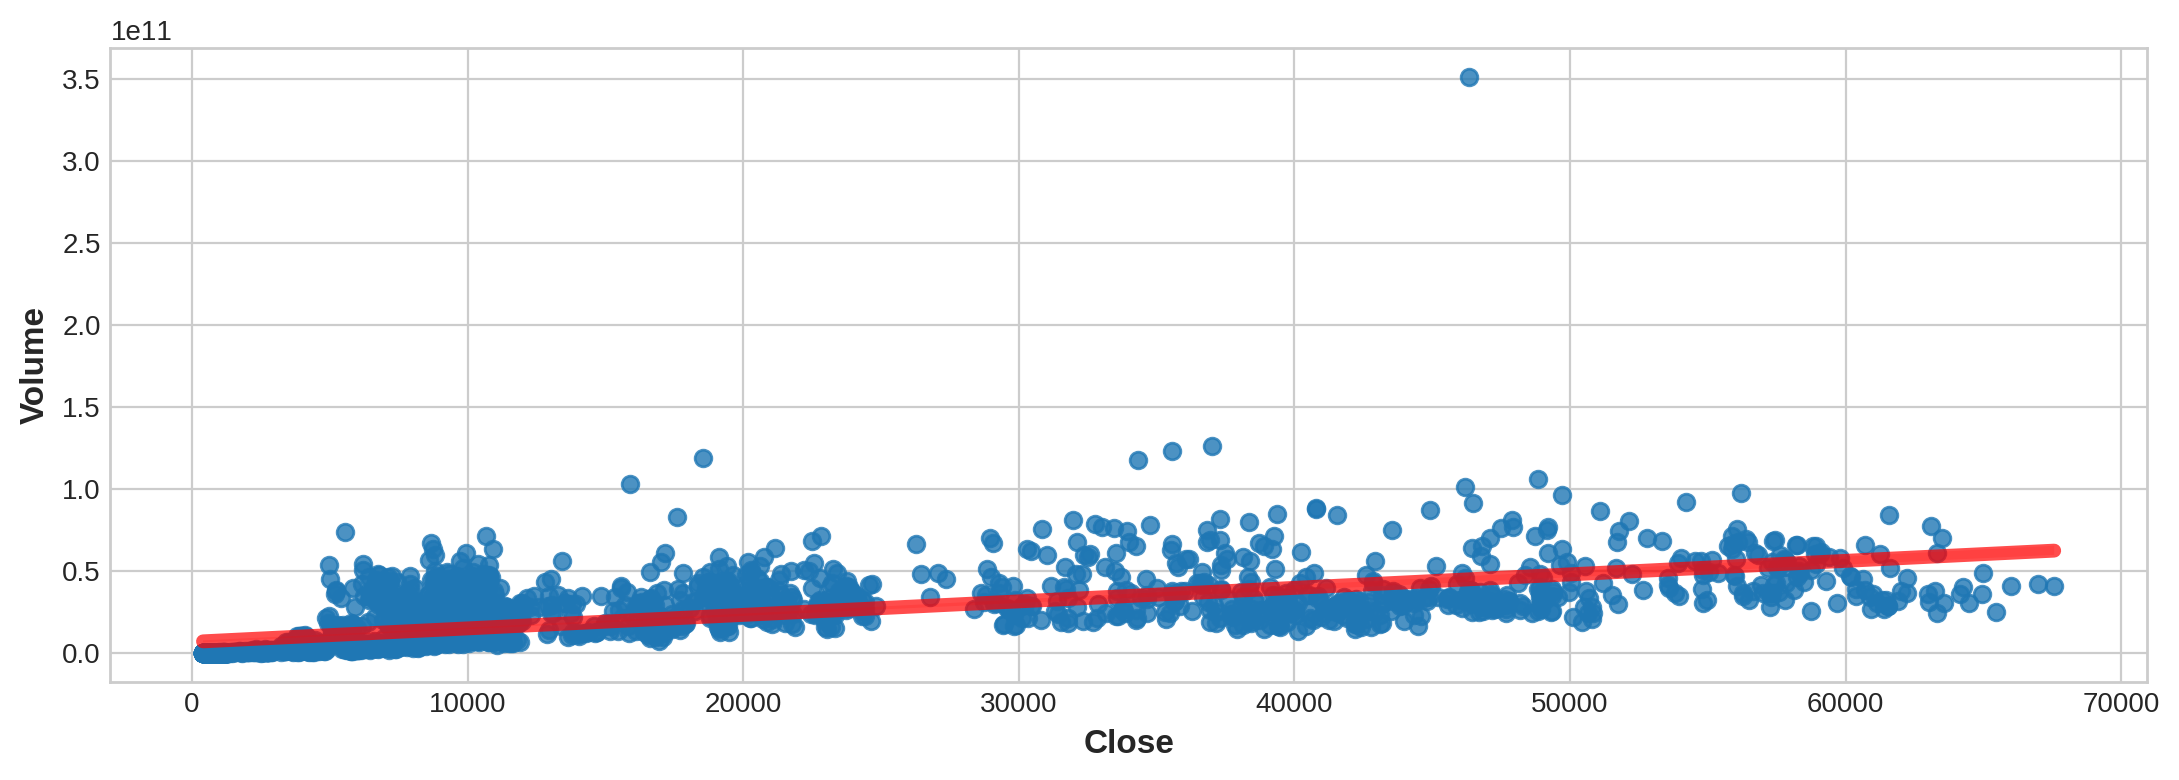

In [477]:
## correlacion entre volumen de transacciones y precio
sns.regplot(x=netf['Close'],y = netf['Volume'], line_kws={"color":"r","alpha":0.7,"lw":5})


# Medidas de tendencia central y dispersion de los datos

In [478]:

Pmean = np.mean(netf['Close']) # media de los precios
Vmean = np.mean(netf['Volume']) # media del volumen de transacciones
Pstand = np.std(netf['Close']) # desviacion standar de los precios
Vstand = np.std(netf['Volume']) # desviacion standar del volumen

print((Pmean, Vmean, Pstand, Vstand))

(15629.626034417057, 19866354432.56534, 16488.07235194207, 20196859116.731033)


### coeficientes de variacion

In [479]:
Pcv = (Pstand/Pmean)*100 # Coeficiente de varicion del precio del bitcoin
Vcv = (Vstand/Vmean)*100 # coeficiente de variacion del volumen de transacciones del bitcoin
print((Pcv, Vcv))

(105.4924303091749, 101.66364032861472)


In [480]:
netf['Close'] = pd.to_numeric(netf['Close'], errors='coerce')
netf['Volume'] = pd.to_numeric(netf['Volume'], errors='coerce')
netf = netf.dropna()


Primedian = np.median(netf['Close']) # mediana de los precios
Vmedian = np.median(netf['Volume']) # mediana del volumen de transacciones
print((Primedian, Vmedian))

(8936.8442385, 16794011634.0)


In [481]:
Pcv_range = np.max(netf['Close']) - np.min(netf['Close']) # rango del coeficiente de variacion
Vcv_range = np.max(netf['Volume']) - np.min(netf['Volume']) # rango del coeficiente de variacion del volumen de transacciones

print("Rangos del coeficiente de variacion:", (Pcv_range, Vcv_range))

Rangos del coeficiente de variacion: (67166.258118, 350939427479.0)


### revision de estacionalidad de la serie




In [482]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
sts.adfuller(netf['Close'])

(-1.6295424150357913,
 0.46773024064200686,
 27,
 2528,
 {'1%': -3.432939379929173,
  '5%': -2.862683979868293,
  '10%': -2.5673789838429837},
 41377.37410725924)

### interpretacion
El resultado de la prueba de Dickey-Fuller aumentada (ADF) indica que el valor del estadístico de prueba es -1.63. Este valor es mayor que el valor crítico en todos los niveles de significancia del 1%, 5% y 10%. Esto significa que no podemos rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria, lo que indica que es no estacionaria.

El segundo valor de la tupla (0.47) es el valor p de la prueba, que indica la probabilidad de obtener un estadístico de prueba igual o más extremo que el que se observó, dado que la hipótesis nula es verdadera. En este caso, un valor p mayor que 0.05 (nivel de significancia del 5%) sugiere que no podemos rechazar la hipótesis nula de que la serie temporal es no estacionaria.

In [483]:
sts.adfuller(netf['Volume'])

(-1.9936122292494338,
 0.28938091862766546,
 27,
 2528,
 {'1%': -3.432939379929173,
  '5%': -2.862683979868293,
  '10%': -2.5673789838429837},
 123023.35080406799)

### interpretacion
El resultado de la prueba de Dickey-Fuller aumentada (ADF) indica que el valor del estadístico de prueba es -1.99. Este valor es mayor que el valor crítico en todos los niveles de significancia del 1%, 5% y 10%. Esto significa que no podemos rechazar la hipótesis nula de que la serie temporal tiene una raíz unitaria, lo que indica que es no estacionaria.

El segundo valor de la tupla (0.28) es el valor p de la prueba, que indica la probabilidad de obtener un estadístico de prueba igual o más extremo que el que se observó, dado que la hipótesis nula es verdadera. En este caso, un valor p mayor que 0.05 (nivel de significancia del 5%) sugiere que no podemos rechazar la hipótesis nula de que la serie temporal es no estacionaria.

Para el siguiente paso vamos a generar una nueva serie con el calculo de los retornos de la variable close para ver si esta se vuelve estacionaria.

Text(0.5, 1.0, 'price returns')

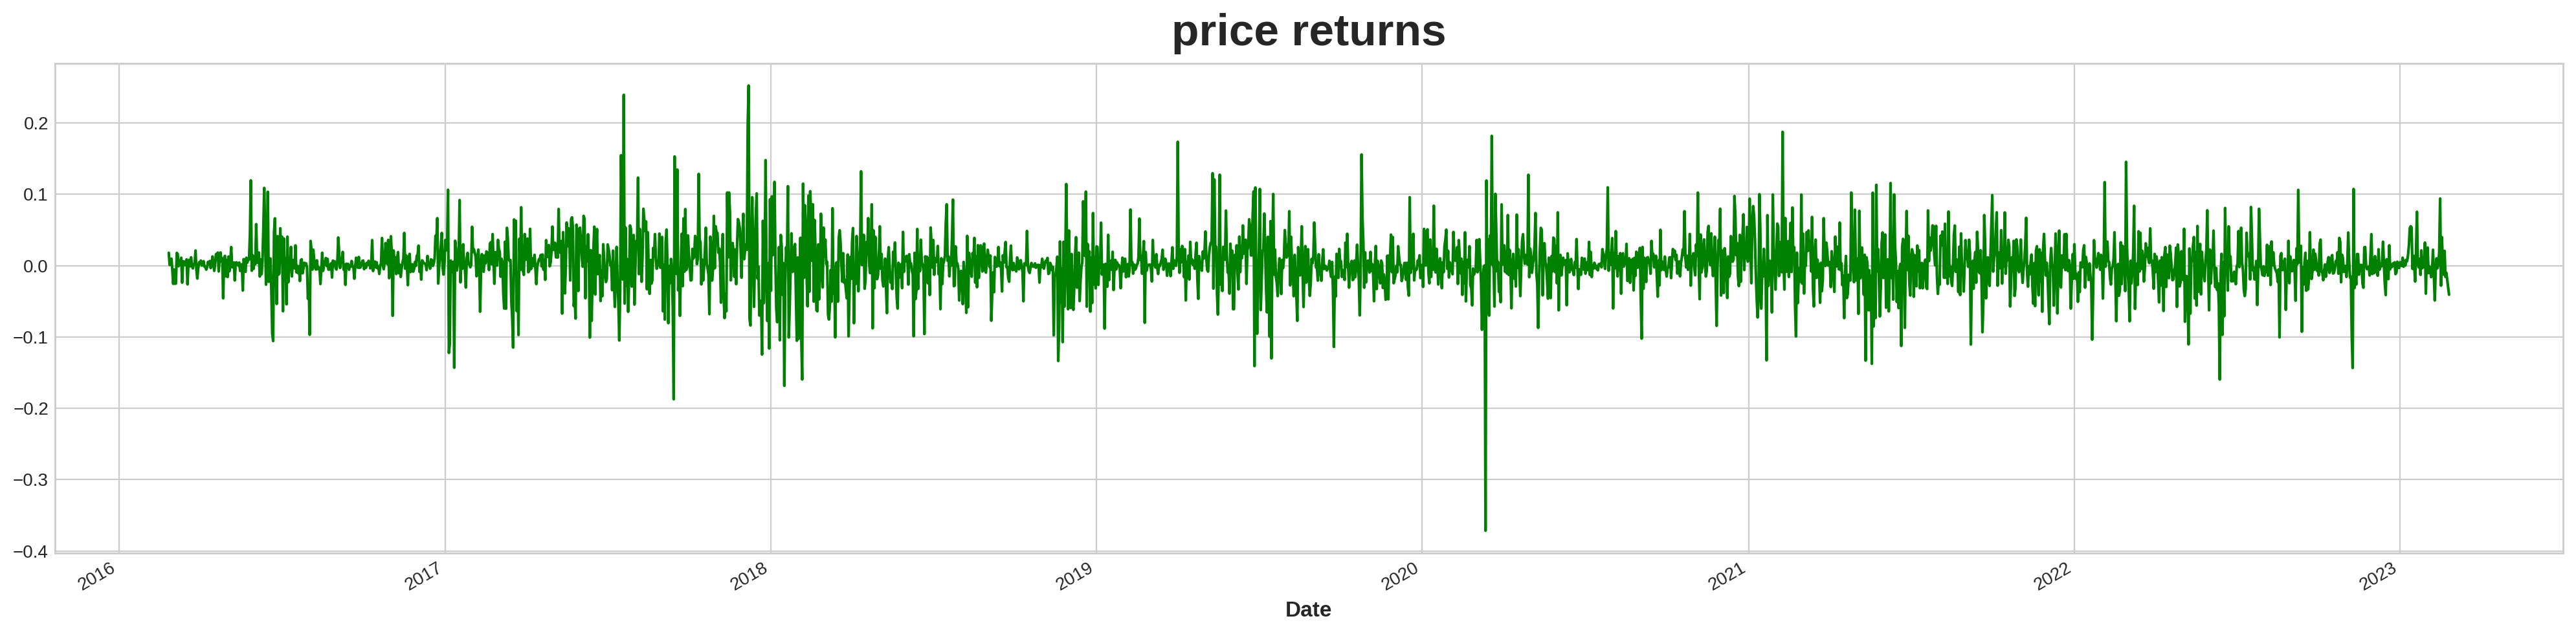

In [484]:
netf['returns']=netf['Close'].pct_change()
netf['returns'].plot(figsize=(20,5), color='green')
plt.title('price returns', size=25)

In [485]:
sts.adfuller(netf.returns[1:])

(-51.566271119699344,
 0.0,
 0,
 2554,
 {'1%': -3.4329129931922178,
  '5%': -2.862672327302294,
  '10%': -2.5673727798916928},
 -9236.801273514408)

### interpretacion
La salida de la función sugiere que se ha obtenido un valor estadístico de prueba (test statistic) de -51.566 y un p-value de 0.0. También muestra el número de retrasos utilizado en la regresión (0), el número de observaciones en la muestra (2554) y los valores críticos de la prueba para diferentes niveles de significancia (1%, 5%, y 10%).

En general, el resultado indica que la serie temporal de retornos de bitcoin es estacionaria en el nivel del 1% de significancia, ya que el valor estadístico de prueba es menor que el valor crítico al nivel del 1% y el p-value es menor que 0.05. Esto sugiere que no hay evidencia suficiente para rechazar la hipótesis alternativa de que la serie temporal tiene una raíz unitaria, lo que implica que la serie es estacionaria.



## tratamiento de outliers Haampell filter


In [486]:
def hampel_filter_forloop(input_series, window_size, n_sigmas=3):

    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution

    indices = []

    # possibly use np.nanmedian
    for i in range((window_size),(n - window_size)):
        x0 = np.median(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.median(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if (np.abs(input_series[i] - x0) > n_sigmas * S0):
            new_series[i] = x0
            indices.append(i)

    return new_series, indices


In [487]:
res, detected_outliers = hampel_filter_forloop(netf['Close'], 5)
detected_outliers

[31,
 32,
 334,
 335,
 393,
 394,
 395,
 506,
 507,
 557,
 681,
 695,
 768,
 789,
 823,
 959,
 960,
 1040,
 1053,
 1073,
 1108,
 1109,
 1119,
 1153,
 1294,
 1322,
 1390,
 1391,
 1558,
 1619,
 1635,
 1895,
 2009,
 2013,
 2064,
 2101,
 2204,
 2293,
 2460,
 2461,
 2477,
 2483,
 2489]

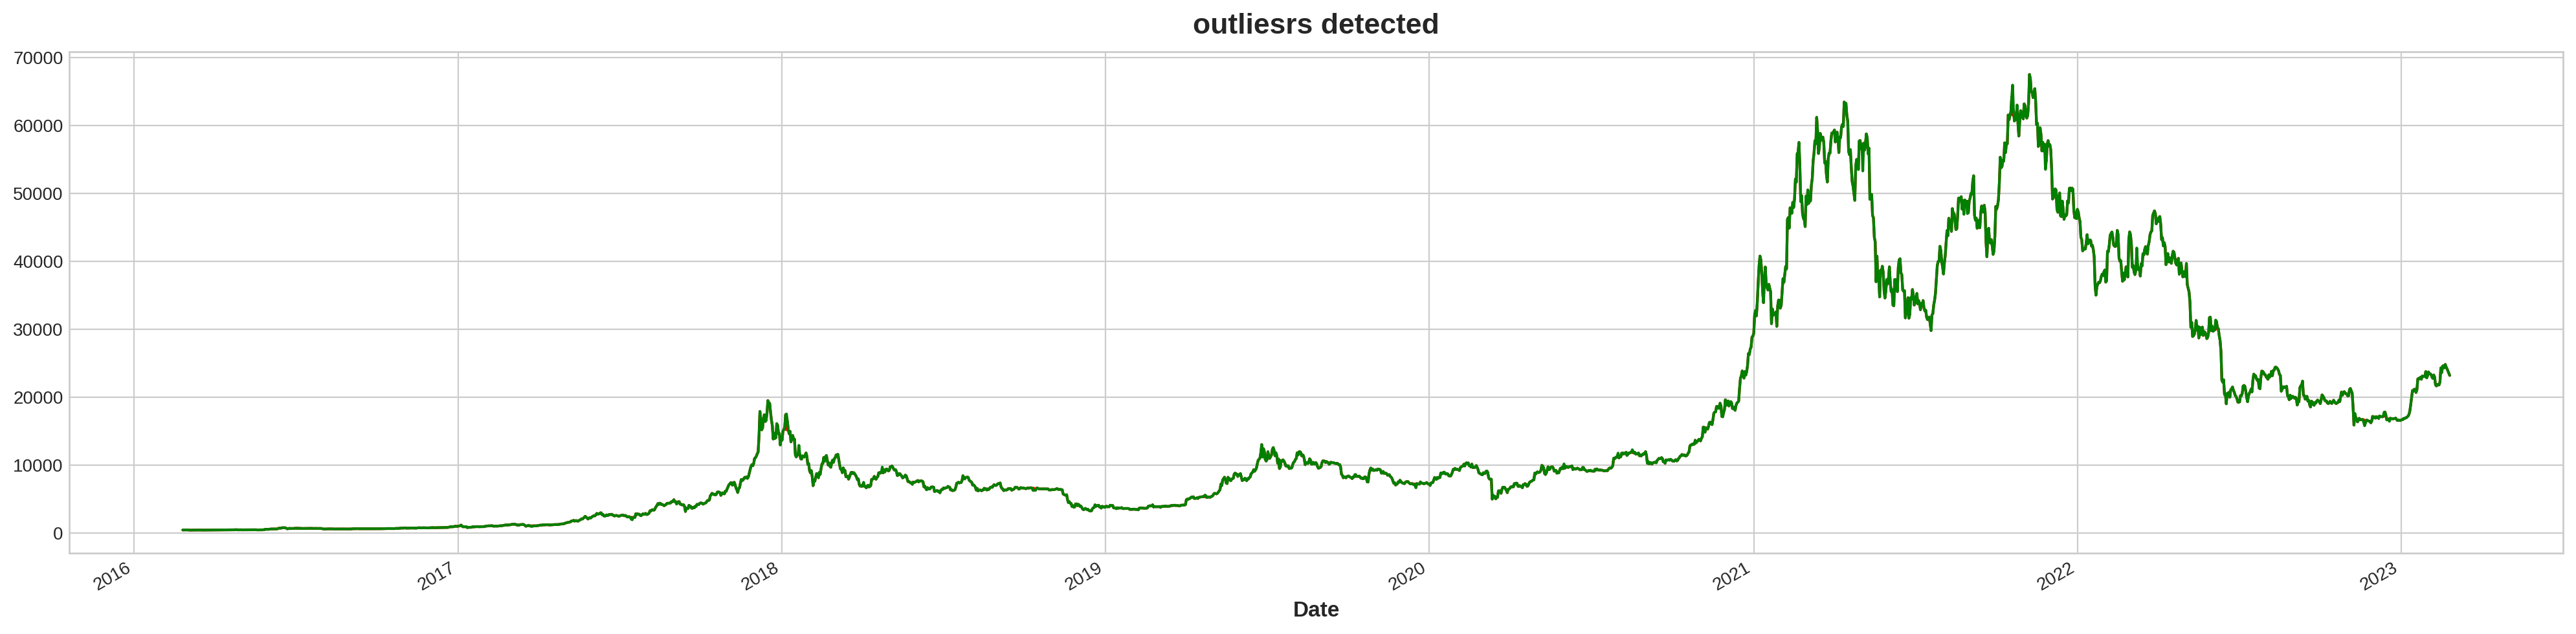

In [488]:
res.plot(figsize=(20, 5), color='red')
netf['Close'].plot(color="green")
plt.title('outliesrs detected')
plt.show()

### prueba de estacionariedad para la serie recompuesta.


In [489]:
sts.adfuller(res)

(-1.61145733526746,
 0.4772106337209866,
 27,
 2528,
 {'1%': -3.432939379929173,
  '5%': -2.862683979868293,
  '10%': -2.5673789838429837},
 41257.334265836056)

### Retornos para una serie  SIN OUTLIERS

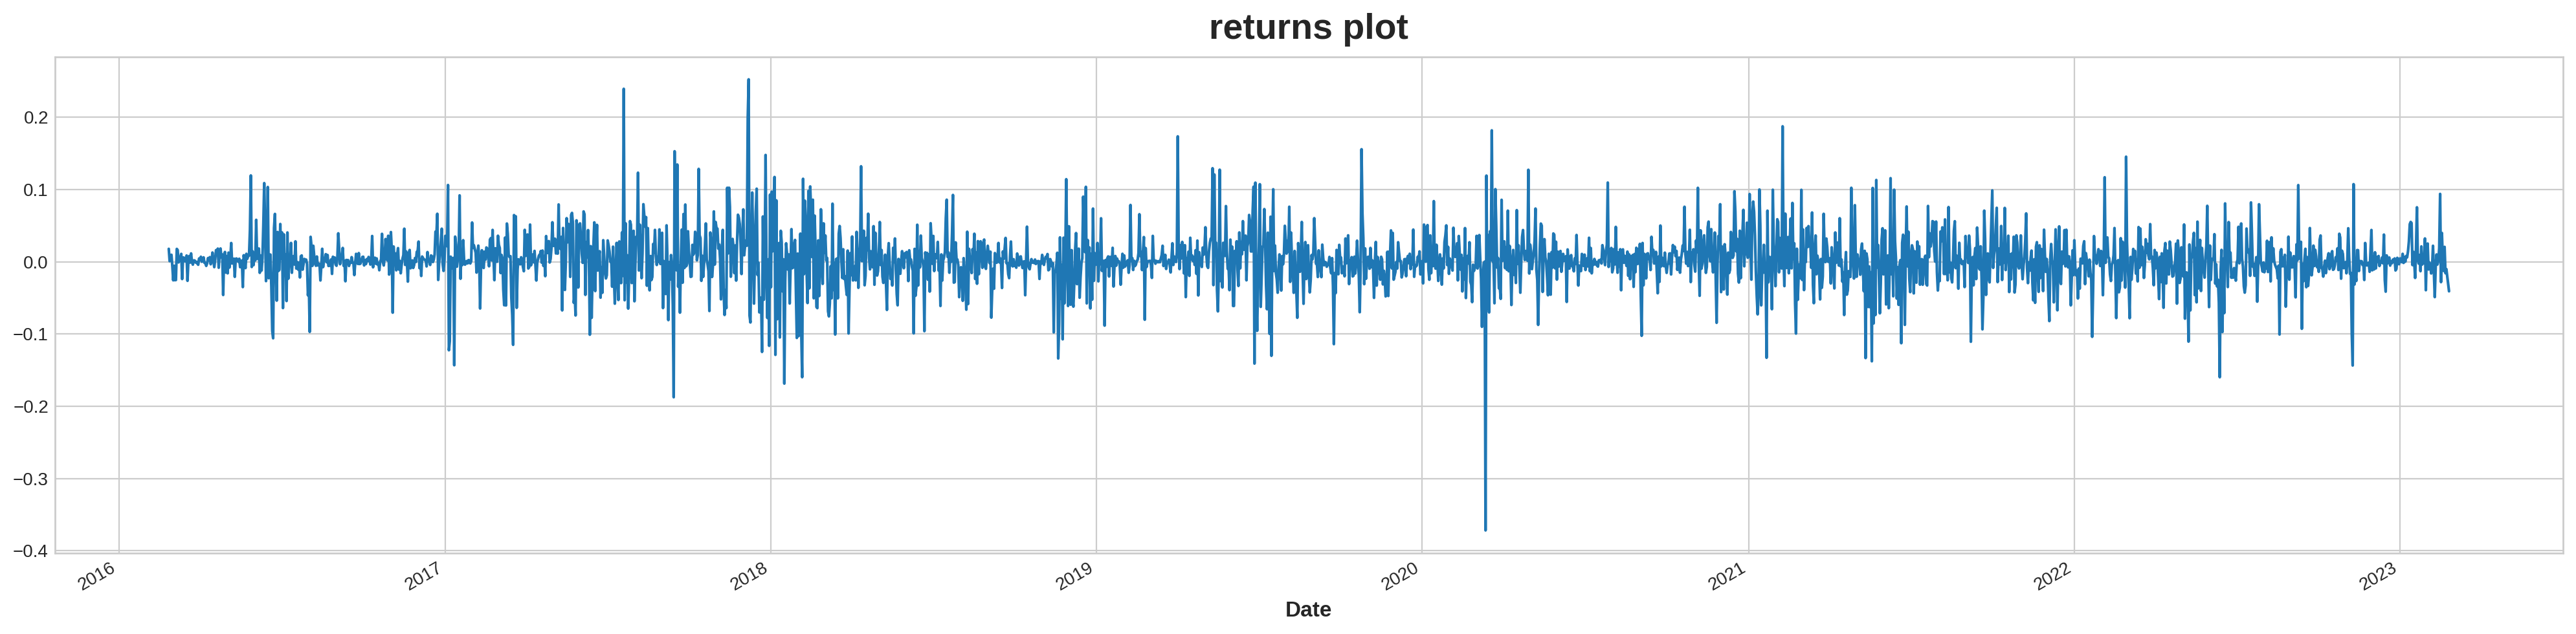

In [490]:
netfwo = res.copy() ### serie del bitcoin sin outliers

returnsw = netfwo.pct_change()

netfwo['returns'] = returnsw

netfwo["returns"].plot(figsize=(20, 5))
plt.title('returns plot', size=20)
plt.show()


## Analisis de la tendencia


In [491]:
### creamos un vector con la variable tiempo como Dummy

from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index = res.index,
    constant=True,
    order = 1,
    drop = True
)


X = dp.in_sample()

X.head()

const  trend
Date                    
2016-02-25    1.0    1.0
2016-02-26    1.0    2.0
2016-02-27    1.0    3.0
2016-02-28    1.0    4.0
2016-02-29    1.0    5.0

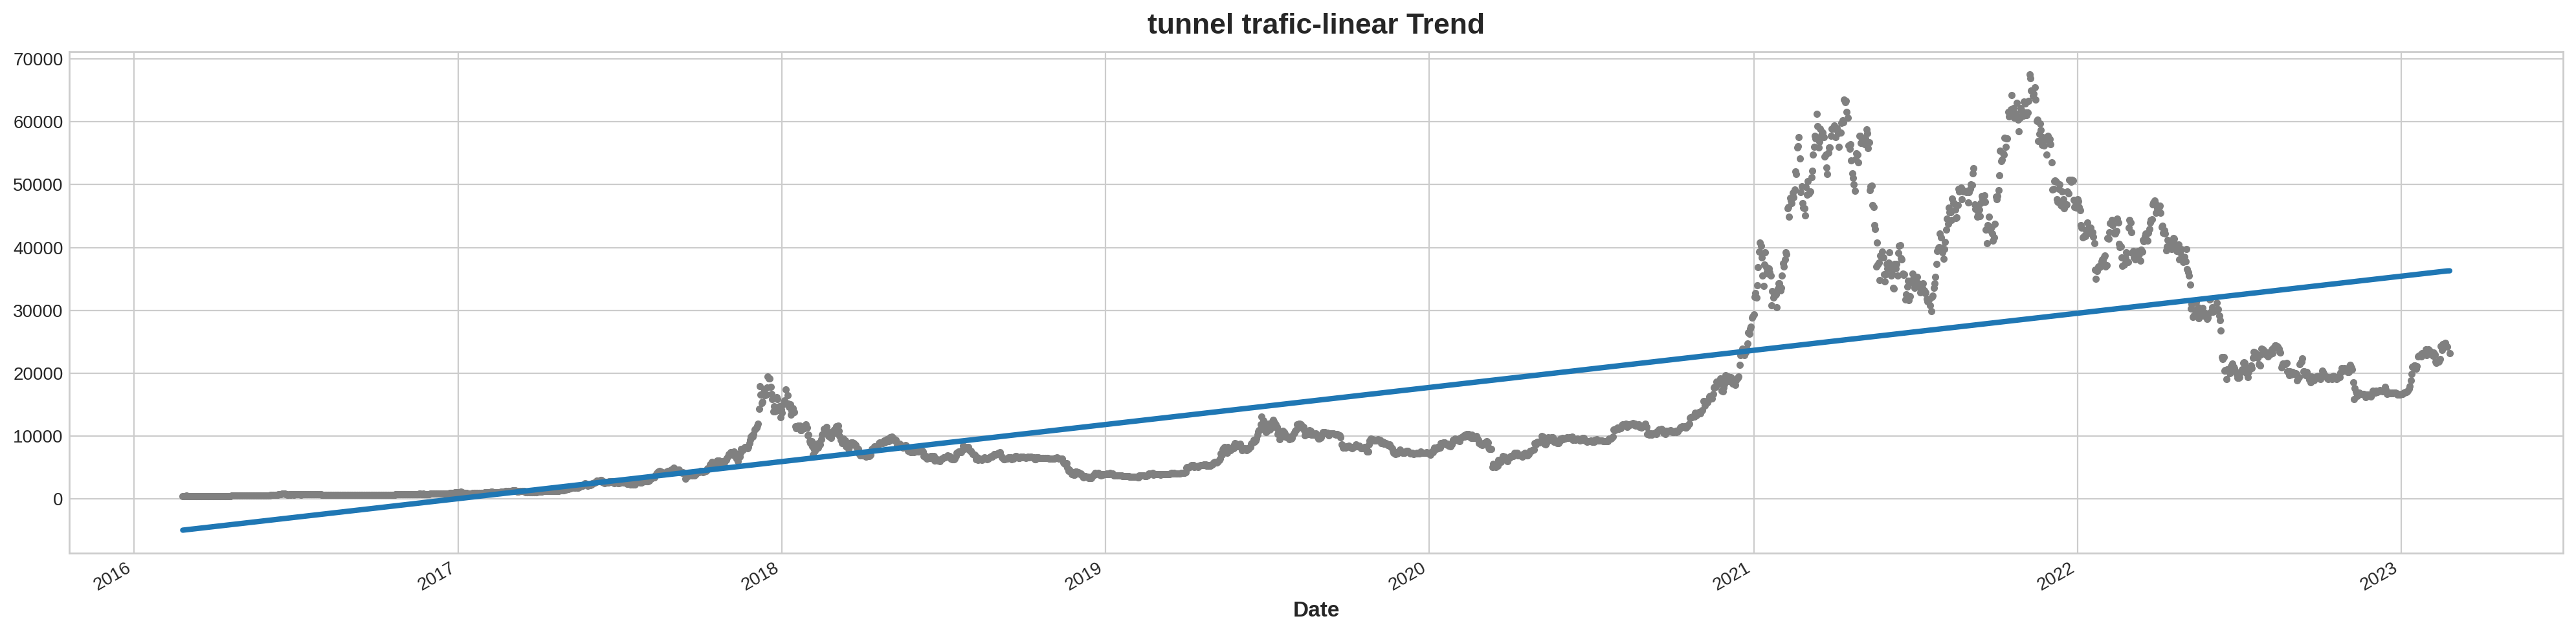

In [492]:
### fit the linear regression
from sklearn.linear_model import LinearRegression
y = res

model = LinearRegression(fit_intercept=False)
a1 = model.fit(X, y)
y_pred = pd.Series(model.predict(X), X.index)


### grafica de la tendencia

ax = res.plot(style=".", color="0.5", title="tunnel trafic-linear Trend", figsize=(20,5))
_=y_pred.plot(ax=ax, linewidth=3, label="Trend")


## tendencia Cuadratica


In [493]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp3 = DeterministicProcess(
    index = res.index,
    constant=True,
    order = 2,
    drop = True
)


X2 = dp3.in_sample()

X2.head()

const  trend  trend_squared
Date                                   
2016-02-25    1.0    1.0            1.0
2016-02-26    1.0    2.0            4.0
2016-02-27    1.0    3.0            9.0
2016-02-28    1.0    4.0           16.0
2016-02-29    1.0    5.0           25.0

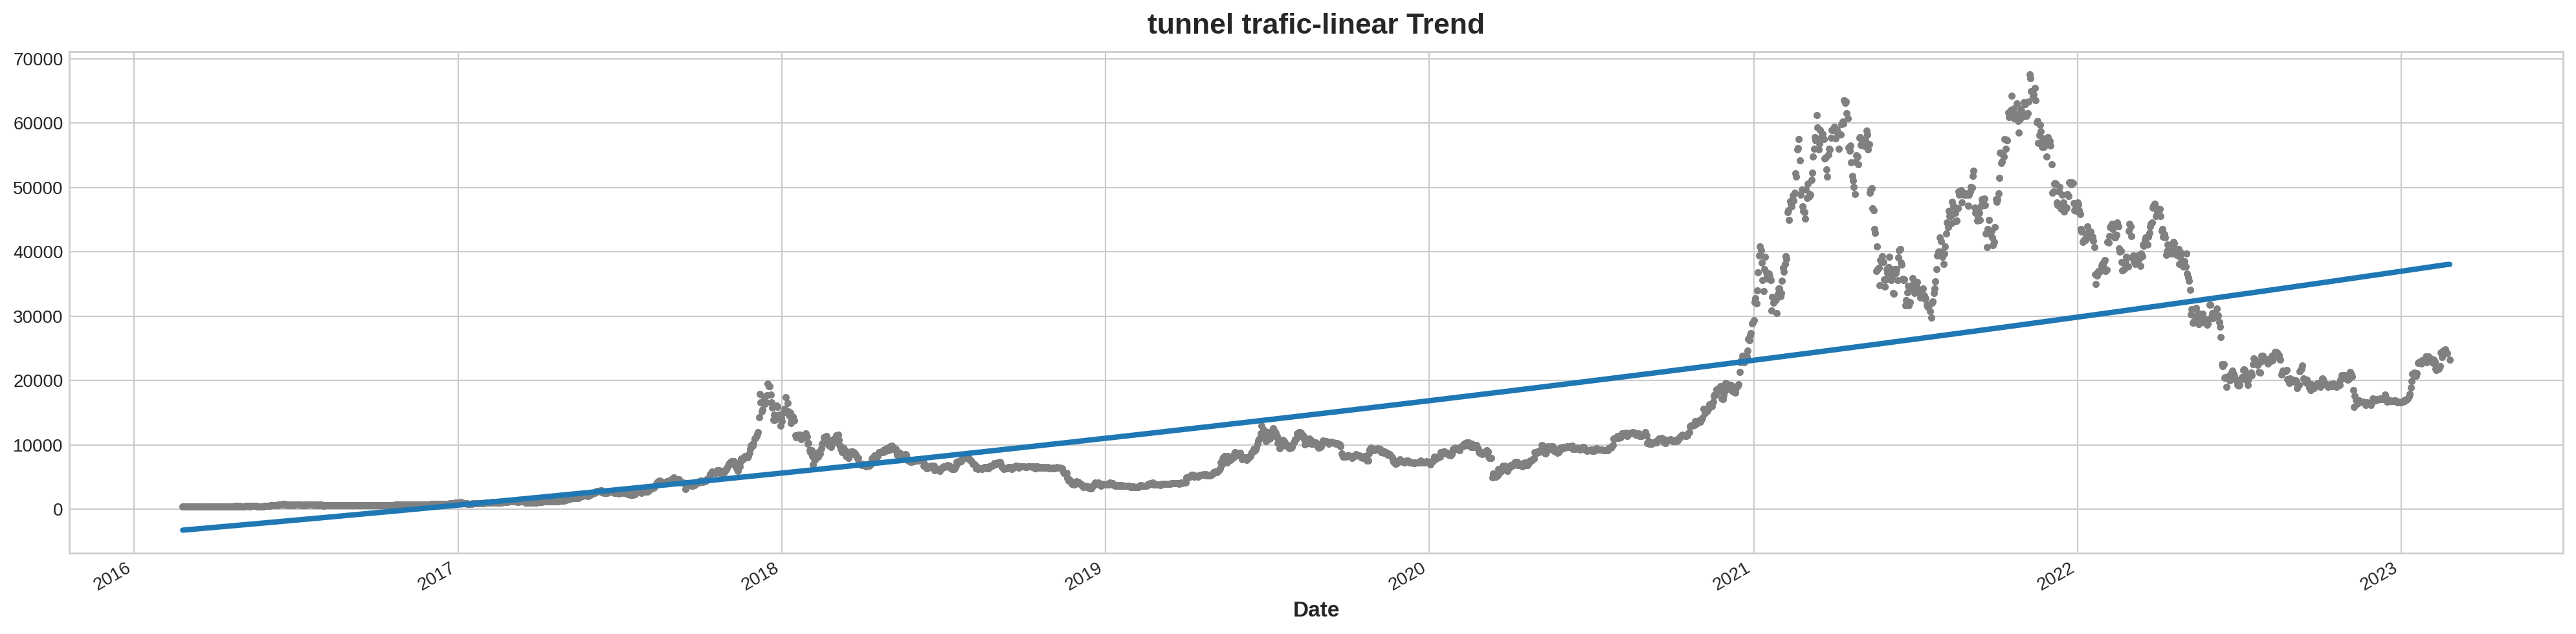

In [494]:
from sklearn.linear_model import LinearRegression
y = res

model2 = LinearRegression(fit_intercept=False)
model2.fit(X2, y)
y_pred2 = pd.Series(model2.predict(X2), X2.index)


### grafica de la tendencia

ax = res.plot(style=".", color="0.5", title="tunnel trafic-linear Trend", figsize=(20,5))
_=y_pred2.plot(ax=ax, linewidth=3, label="Trend")

# Tendencia cubica


In [495]:
### creamos un vector con la variable tiempo como Dummy

from statsmodels.tsa.deterministic import DeterministicProcess
dp3 = DeterministicProcess(
    index = res.index,
    constant=True,
    order = 3,
    drop = True
)


X3 = dp3.in_sample()

X3.head()

const  trend  trend_squared  trend_cubed
Date                                                
2016-02-25    1.0    1.0            1.0          1.0
2016-02-26    1.0    2.0            4.0          8.0
2016-02-27    1.0    3.0            9.0         27.0
2016-02-28    1.0    4.0           16.0         64.0
2016-02-29    1.0    5.0           25.0        125.0

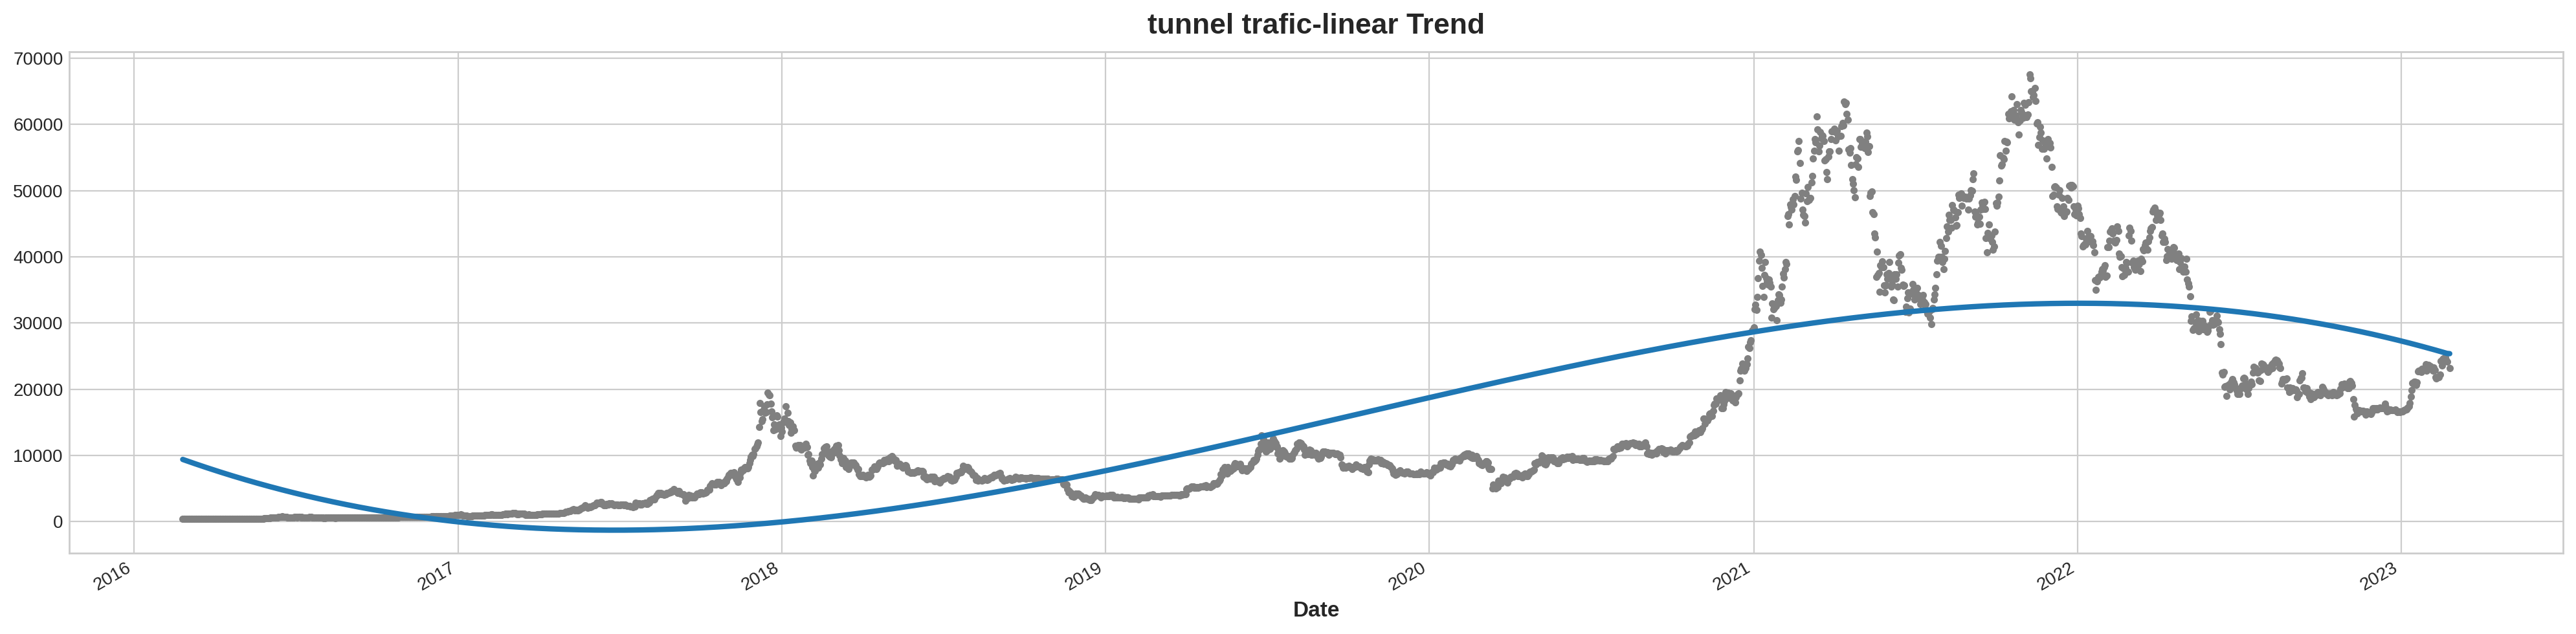

In [496]:
### fit the linear regression
from sklearn.linear_model import LinearRegression
y = res

model3 = LinearRegression(fit_intercept=False)
model3.fit(X3, y)
y_pred3 = pd.Series(model3.predict(X3), X3.index)


### grafica de la tendencia

ax = res.plot(style=".", color="0.5", title="tunnel trafic-linear Trend", figsize=(20,5))
_=y_pred3.plot(ax=ax, linewidth=3, label="Trend")


# evaluacion de la tendencia

In [497]:
# r cuadrado ajustado del modelo 1
1-(model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)


0.47631514805400477

In [498]:
# r cuadrado ajustado del modelo 2
1-(model2.score(X2, y))*(len(y)-1)/(len(y)-X2.shape[1]-1)

0.47382813651690336

In [499]:
# rcuadrado ajustado para el modelo 3
1-(model3.score(X3, y))*(len(y)-1)/(len(y)-X3.shape[1]-1)

0.3888617685548623

In [500]:
from sklearn.metrics import r2_score
score_1 = r2_score(y, y_pred)
score_2 = r2_score(y, y_pred2)
score_3 = r2_score(y, y_pred3)

print((score_1, score_2, score_3))

(0.5232749225119866, 0.5255540491619815, 0.6101814592628361)


### interpretacion
el valor del r cuadrado ajustado indica que los valores en la potencia cubica y cudrada tienen variables que no son significativas para el modelo.

### r_cuadrado

In [501]:
### errores de cada modelo
s1 = (y-y_pred)
s2 = (y-y_pred2)
s3 = (y-y_pred3)
# suma de los errores al cuadrado.
sse1 = sum(s1**2)
sse2 = sum(s2**2)
sse3 = sum(s3**3)
#impresion de los resultados.
print("SSE1:", sse1)
print("SSE2:", sse2)
print("SSE3:", sse3)


SSE1: 331355410449.92645
SSE2: 329771266921.0071
SSE3: 2192491666585129.5


### Interpretacion
SSE1: 331355410449.92645
Este valor indica que la suma total de los errores al cuadrado para el primer modelo es de aproximadamente 331,355,410,449.93. Cuanto mayor sea el valor del SSE, mayor será la discrepancia entre los valores observados y los valores predichos por este modelo específico.

SSE2: 329771266921.0071
El valor del SSE para el segundo modelo es de aproximadamente 329,771,266,921.01. Al comparar con el SSE1, podemos decir que el segundo modelo tiene un SSE ligeramente menor, lo que indica una mejor capacidad para explicar y predecir los valores observados en comparación con el primer modelo.

SSE3: 2192491666585129.5
Este valor extremadamente alto de SSE indica una discrepancia significativa entre los valores observados y los valores predichos por el tercer modelo. Un SSE tan elevado sugiere que el modelo no es capaz de explicar adecuadamente los datos y puede indicar una falta de ajuste o una mala elección de variables predictoras.

## intervalos de confianza

##### primera regresion



In [502]:
## estimacion del error estandar de los coeficientes
mse = np.mean(s1**2) # error cuadrado medio
### intervalos y el intercepto
intercept = model.intercept_
coeficents = model.coef_
### calculo de varianza
variance = np.linalg.inv(np.dot(X.T,X)).diagonal()
## error estandar de los coeficientes
se = np.sqrt(mse*variance)
print("error estandar:", se)

error estandar: [4.50550655e+02 3.05222110e-01]


### intervalos de confianza


In [503]:
alpha = 0.05 ## definimos el nivel de significancia
z_score = np.abs(np.percentile(s1, 100 * (1-alpha / 2)))
lower_bound = coeficents - z_score * se
upper_bound = coeficents + z_score * se
confidence_intervals = np.hstack((lower_bound.reshape(1, -1), upper_bound.reshape(1, -1)))
print("coeficientes:")
print(coeficents)
print("intervalos de confianza: ")
print(confidence_intervals)

coeficientes:
[-5039.95449067    16.16692327]
intervalos de confianza: 
[[-1.43910601e+07 -9.72953290e+03  1.43809802e+07  9.76186674e+03]]


# interpretacion
los intervalos de confianza no contienen el valor de cero por lo que podemos asegurar que ambos coeficientes son estadisticamente significativos para el modelo.
### intervalos del modelo 2

In [504]:
## estimacion del error estandar de los coeficientes
mse2 = np.mean(s2**2) # error cuadrado medio
### intervalos y el intercepto
intercept2 = model2.intercept_
coeficents2 = model2.coef_
### calculo de varianza
variance2 = np.linalg.inv(np.dot(X2.T,X2)).diagonal()
## error estandar de los coeficientes
se2 = np.sqrt(mse2*variance2)
print("error estandar:", se2)

error estandar: [6.74538471e+02 1.21841362e+00 4.61381606e-04]


In [505]:
#alpha = 0.05 ## definimos el nivel de significancia
z_score2 = np.abs(np.percentile(s2, 100 * (1-alpha / 2)))
lower_bound2 = coeficents2 - z_score2 * se2
upper_bound2 = coeficents2 + z_score2 * se2
confidence_intervals2 = np.hstack((lower_bound2.reshape(1, -1), upper_bound2.reshape(1, -1)))
print("coeficientes:")
print(coeficents2)
print("intervalos de confianza: ")
print(confidence_intervals2)

coeficientes:
[-3.27752571e+03  1.20330012e+01  1.61670789e-03]
intervalos de confianza: 
[[-2.16279056e+07 -3.90483653e+04 -1.47895421e+01  2.16213505e+07
   3.90724313e+04  1.47927755e+01]]


### interpretacion
el intervalo de confianza del segundo coeficiente contiene el valor de 0 por lo que apuntaria a que este no es estadisticamente significativo.
#### tercer modelo


In [506]:
## estimacion del error estandar de los coeficientes
mse3 = np.mean(s3**2) # error cuadrado medio
### intervalos y el intercepto
intercept3 = model3.intercept_
coeficents3 = model3.coef_
### calculo de varianza
variance3 = np.linalg.inv(np.dot(X3.T,X3)).diagonal()
## error estandar de los coeficientes
se3 = np.sqrt(mse3*variance3)
print("error estandar:", se3)

error estandar: [8.15794743e+02 2.76245916e+00 2.51023773e-03 6.45327783e-07]


In [507]:
#alpha = 0.05 ## definimos el nivel de significancia
z_score3 = np.abs(np.percentile(s3, 100 * (1-alpha / 2)))
lower_bound3 = coeficents3 - z_score3 * se3
upper_bound3 = coeficents3 + z_score3 * se3
confidence_intervals3 = np.hstack((lower_bound3.reshape(1, -1), upper_bound3.reshape(1, -1)))
print("coeficientes:")
print(coeficents3)
print("intervalos de confianza: ")
print(confidence_intervals3)

coeficientes:
[ 9.44451044e+03 -4.76131891e+01  5.99218763e-02 -1.52014518e-05]
intervalos de confianza: 
[[-2.19654780e+07 -7.44595001e+04 -6.75579196e+01 -1.73982848e-02
   2.19843670e+07  7.43642737e+04  6.76777634e+01  1.73678819e-02]]


### Interpretacion
ninguno de los coeficientes cuenta con el 0 dentro de los intervalos de confianza por lo que determinamos que todos los coeficientes son estadisticamente significativos es decir que todos tienen efectos sobre la tendencia.


# Estacionalidad

In [508]:
#### fourier features
def fourier_features(index, freq, order):
  time = np.arange(len(index), dtype=np.float32) # asigna un vector deterministico con el tiempo
  k = 2 * np.pi * (1/freq)*time #formula
  features = {} # lista vacia
  for i in range(1, order + 1):   # consultar Range() es parecido a arange
    features.update({
        f"sin_{freq}_{i}":np.sin(i*k),
        f"cos_{freq}_{i}":np.cos(i*k)
    })
    return pd.DataFrame(features, index=index) # retorna un vector con las variables de la frecuencia

# Compute Fourier features to the 4th order (8 new features) for a
# series y with daily observations and annual seasonality:
#
# fourier_features(y, freq=365.25, order=4)

 *Ejemplo potente*


In [509]:
from pandas._libs.tslibs import Timedelta
from pathlib import Path
from warnings import simplefilter

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
simplefilter("ignore")

#set matplotlib defaults

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11,5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)

%config InlineBackend.figure_format = 'retina'

# revisar aqui-------------------------->
def seasonal_plot(X, y, period, freq, ax=None):
  if ax is None:
    _, ax=plt.subplots() # ",_" ignora el primer termino en esta caso la primera grafica y la segunrda la asigna a ax
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),) # asigna  la paleta de colores
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False
    )
    ax.set_title(f"seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):  # zip() itera dos tuplas y las convierte en listas
      y_ = line.get_ydata()[-1]                    # obtiene los valores de la linea generada por por la variable Y
      ax.annotate(                                 # se utiliza para hacer anotaciones en una grafica de matplotlib
          name,
          xy=(1, y_),
          xytext=(6, 0),
          color=line.get_color(),
          xycoords=ax.get_yaxis_transform(),       # asigna las cordenadas del texto en este caso las ira asignando conforme avance el bucle
          textcoords= "offset points",
          size=14,
          va="center",
      )
    return ax
##### hasta aqui va bien

def plot_periodogram(ts, detrend='linear', ax=None):
  from scipy.signal import periodogram
  fs = Timedelta("1Y")/pd.Timedelta("1D")
  frequencies, spectrum = periodogram(
      ts,
      fs=fs,
      detrend=detrend,
      window="boxcar",
      scaling="spectrum"
  )
  if ax is None:
    _, ax = plt.subplots()
    ax.step(frequencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        ["Annual()",
         "Semmiannual()",
         "Quarterly()",
         "Bimontñy()",
         "Monthly()",
         "Weekly()",
         "Semiwekly()",
         ],
         rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax.set_ylabel("Variance")
    ax.set_table("periodogram")
    return ax



In [510]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

# Prueba de las funciones de estacionalidad


In [511]:
data_dir = "https://raw.githubusercontent.com/Eduarram/time_series-/main1/proyecto%20netflix/BTC-USD.csv"
D = pd.read_csv(data_dir, parse_dates=["Date"])
G = D.set_index("Date").to_period("D")


In [512]:
G.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-02-25  425.036987  427.718994  420.415009  424.544006  424.544006   
2016-02-26  424.628998  432.152008  421.619995  432.152008  432.152008   
2016-02-27  432.838989  434.230988  428.102997  432.519012  432.519012   
2016-02-28  432.571014  435.683014  423.820007  433.503998  433.503998   
2016-02-29  433.437988  441.506989  431.692993  437.696991  437.696991   

                Volume  
Date                    
2016-02-25  70798000.0  
2016-02-26  61486000.0  
2016-02-27  41893600.0  
2016-02-28  53033400.0  
2016-02-29  60694700.0

In [513]:
del G['Adj Close']
del G['High']
del G['Low']
del G['Open']
del G['Volume']



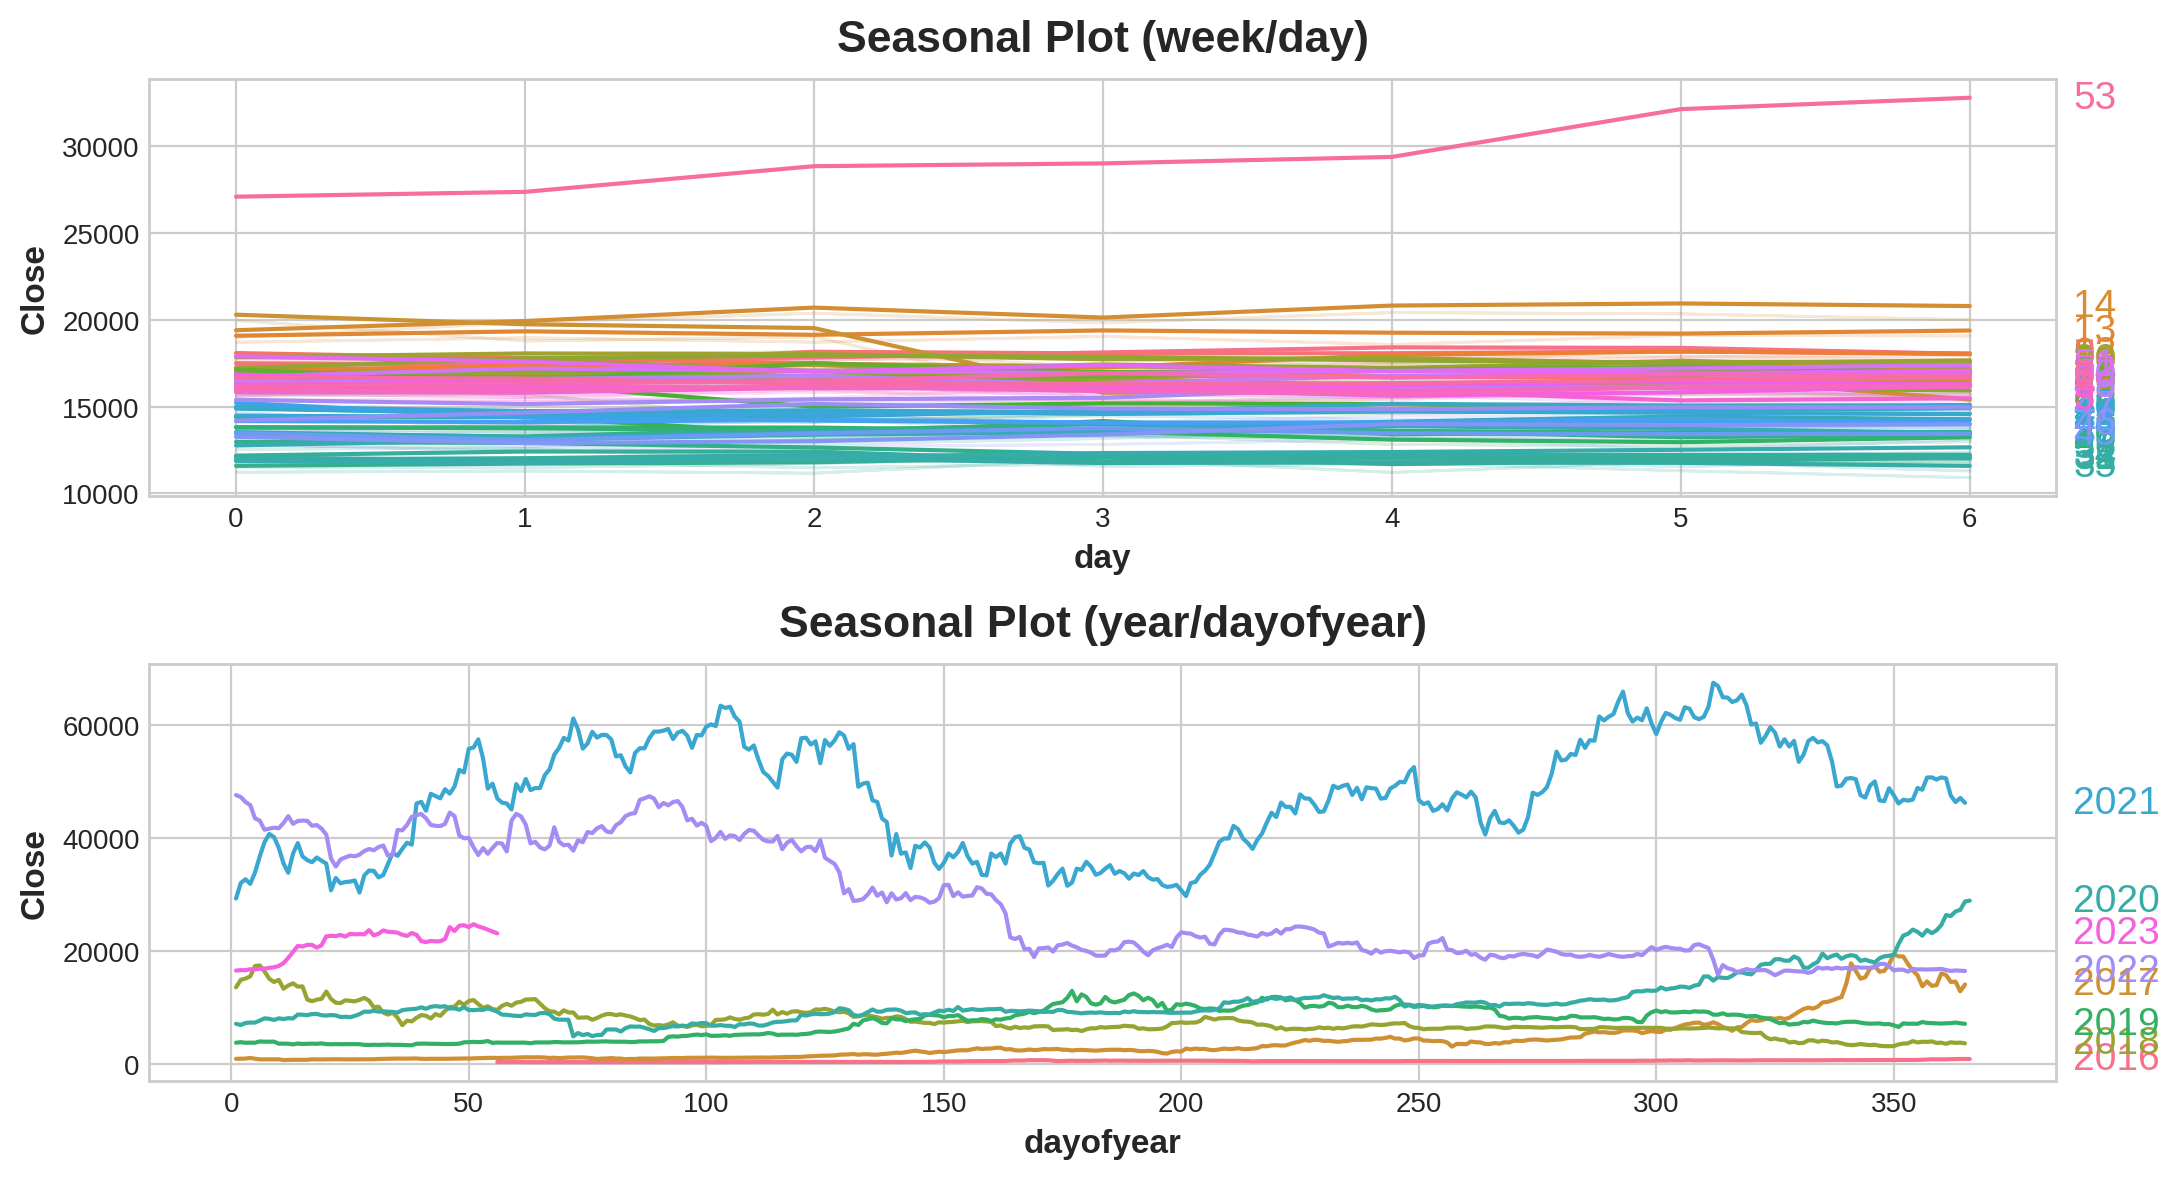

In [514]:

F = G.copy()

F["day"] =  F.index.dayofweek
F["week"] = F.index.week         # the seasonal period(period)
###day_of year period
F["dayofyear"] = F.index.dayofyear
F["year"] = F.index.year

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(F, y='Close', period='week', freq='day', ax=ax0)
seasonal_plot(F, y='Close', period="year", freq="dayofyear", ax=ax1);

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

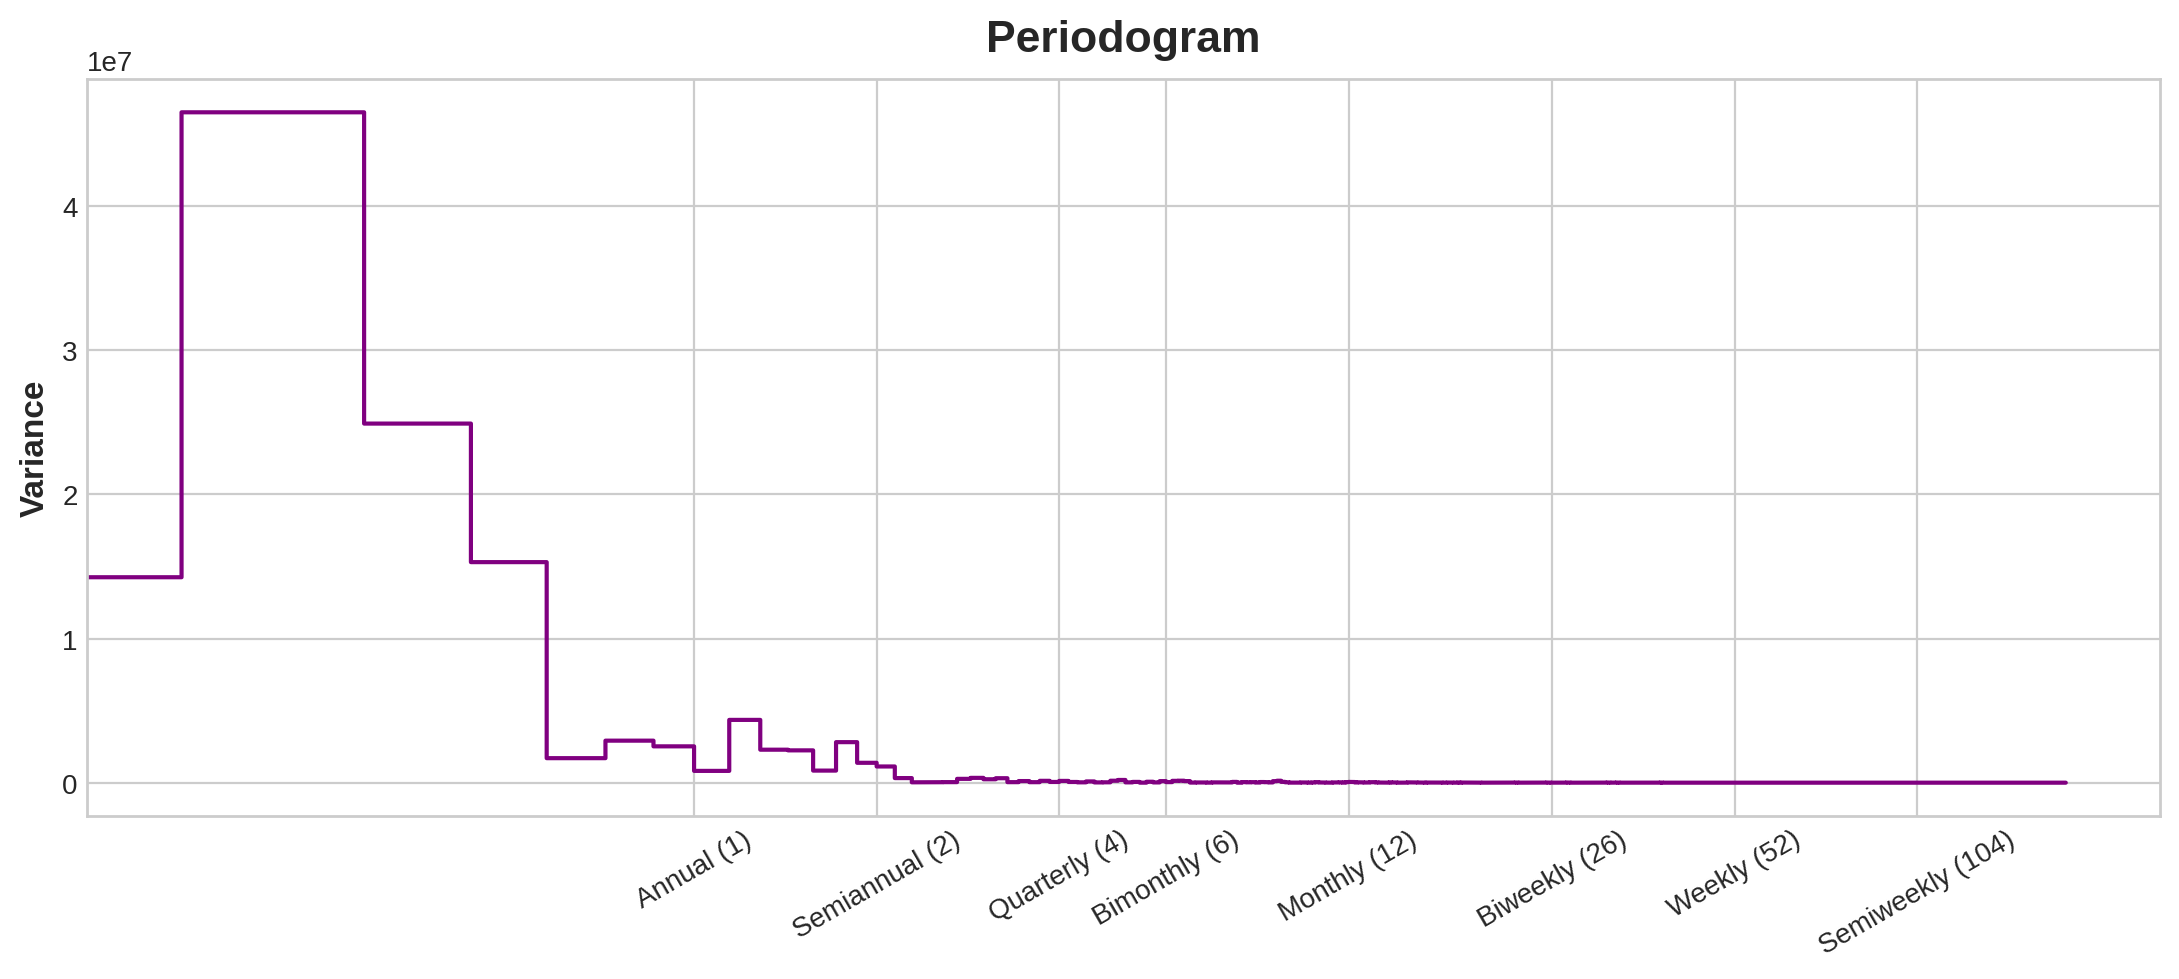

In [515]:
G = G.fillna(method="ffill")
plot_periodogram(G.Close)

# descomposicion estacional con regresiones
- el componenete estacional cae en el periodo anual por lo que determinamos que el "deterministic proces" tiene un componente estacional de 12.


In [516]:
import statsmodels.tsa.deterministic as dt
frequenc = "A"
fourier = dt.CalendarFourier(freq='A', order=48)
print(fourier)

Fourier(freq=A-DEC, order=48)


In [517]:


dp = dt.DeterministicProcess(
    index= G.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True
)

X =dp.in_sample()



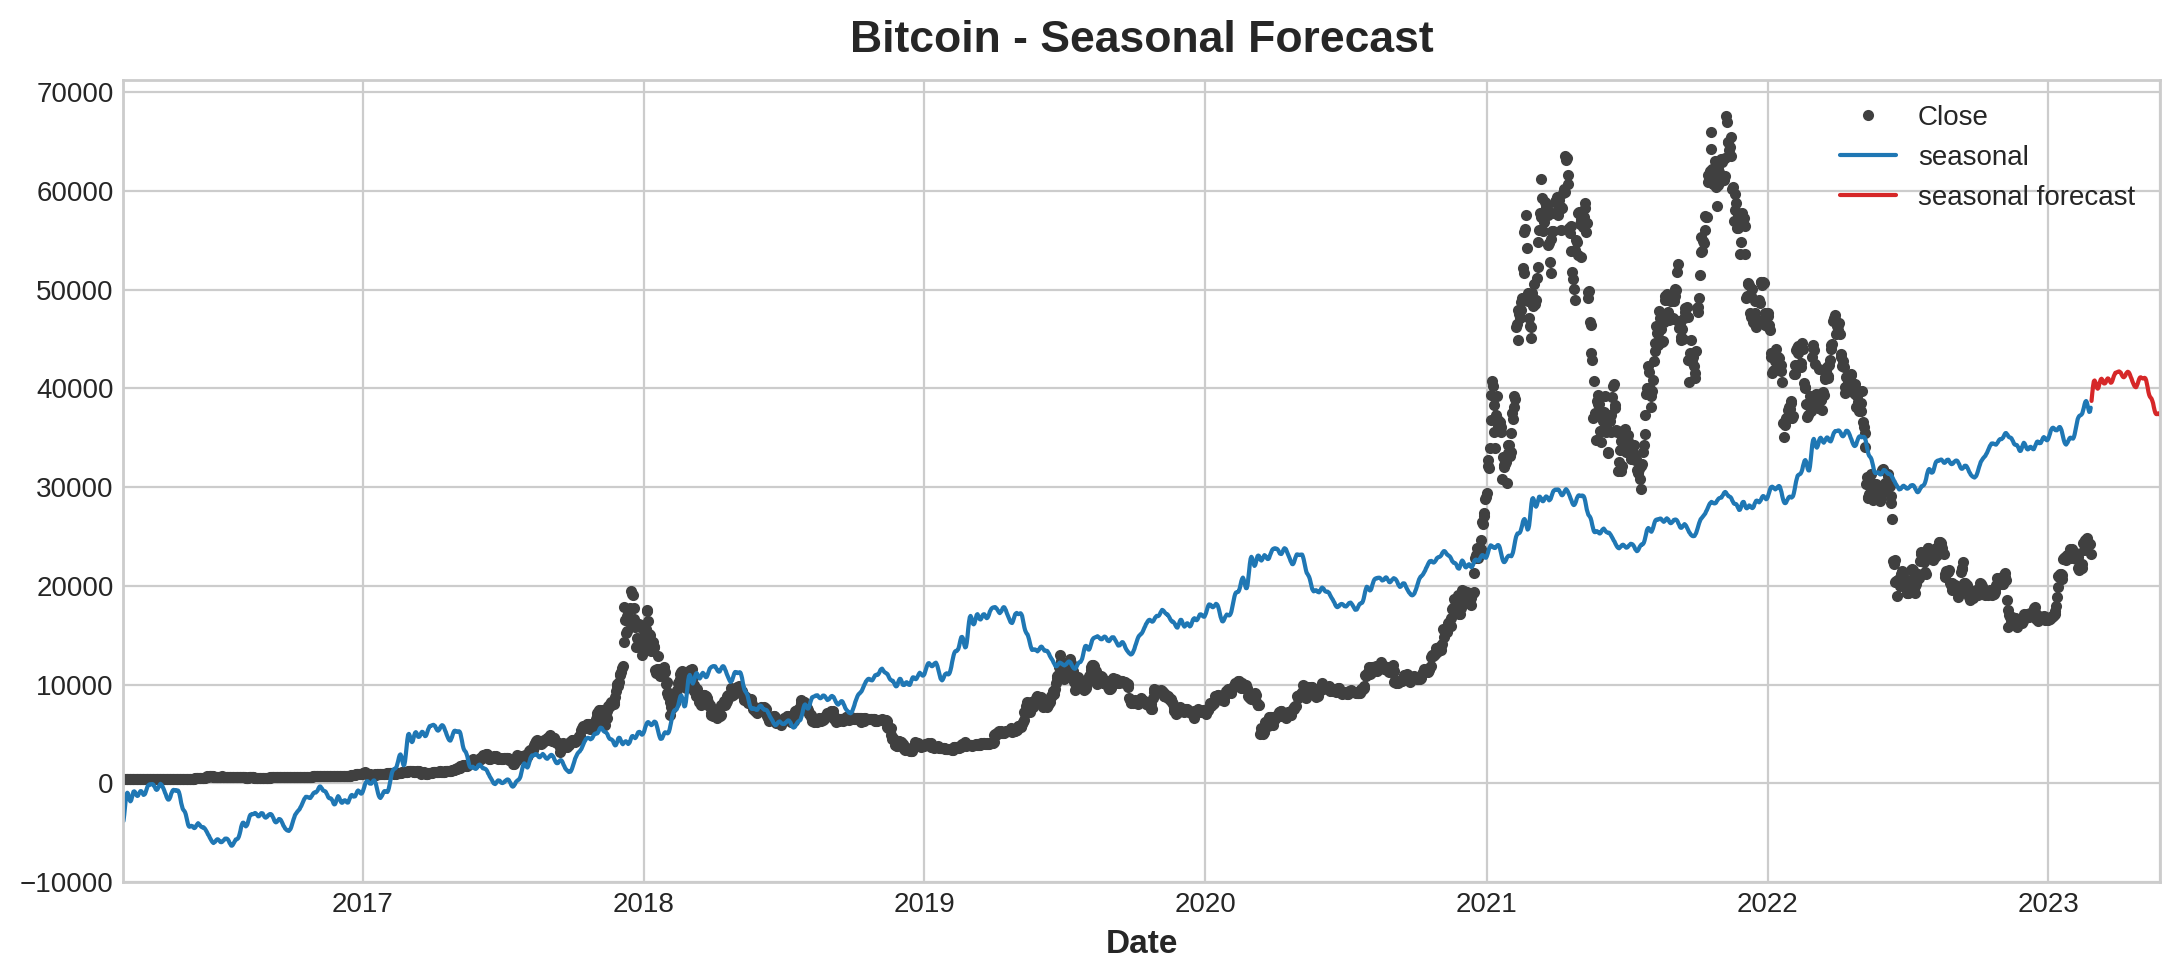

In [518]:
from sklearn.linear_model import LinearRegression
import statsmodels.tsa.deterministic as dt

#obtener la serie de tiempo

y=G['Close']

#entrenamos el modelo

model= LinearRegression(fit_intercept=False)

#ajustar el modelo utilizando X e y
_= model.fit(X, y)

#predecir los valores de y y utilizando el valor ajustado
y_pred = pd.Series(model.predict(X), index=y.index)

# Generar datos fuera de muestra del pronostico
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

#crear un grafico para  visualizar los datos y el pronostico

ax = y.plot(color='0.25', style = '.', title="Bitcoin - Seasonal Forecast")

ax = y_pred.plot(ax=ax, label="seasonal")
ax = y_fore.plot(ax=ax, label="seasonal forecast", color="C3")
_= ax.legend()

# caracteristicas ciclicas y retornos








In [519]:
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [520]:
from pandas.core.common import standardize_mapping
# set matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
    )
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25"
)

%config InlineBackend.figure_format = 'retina'

def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax



def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
        plt.setp(axs[-1, :], xlabel=x.name)
        plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig





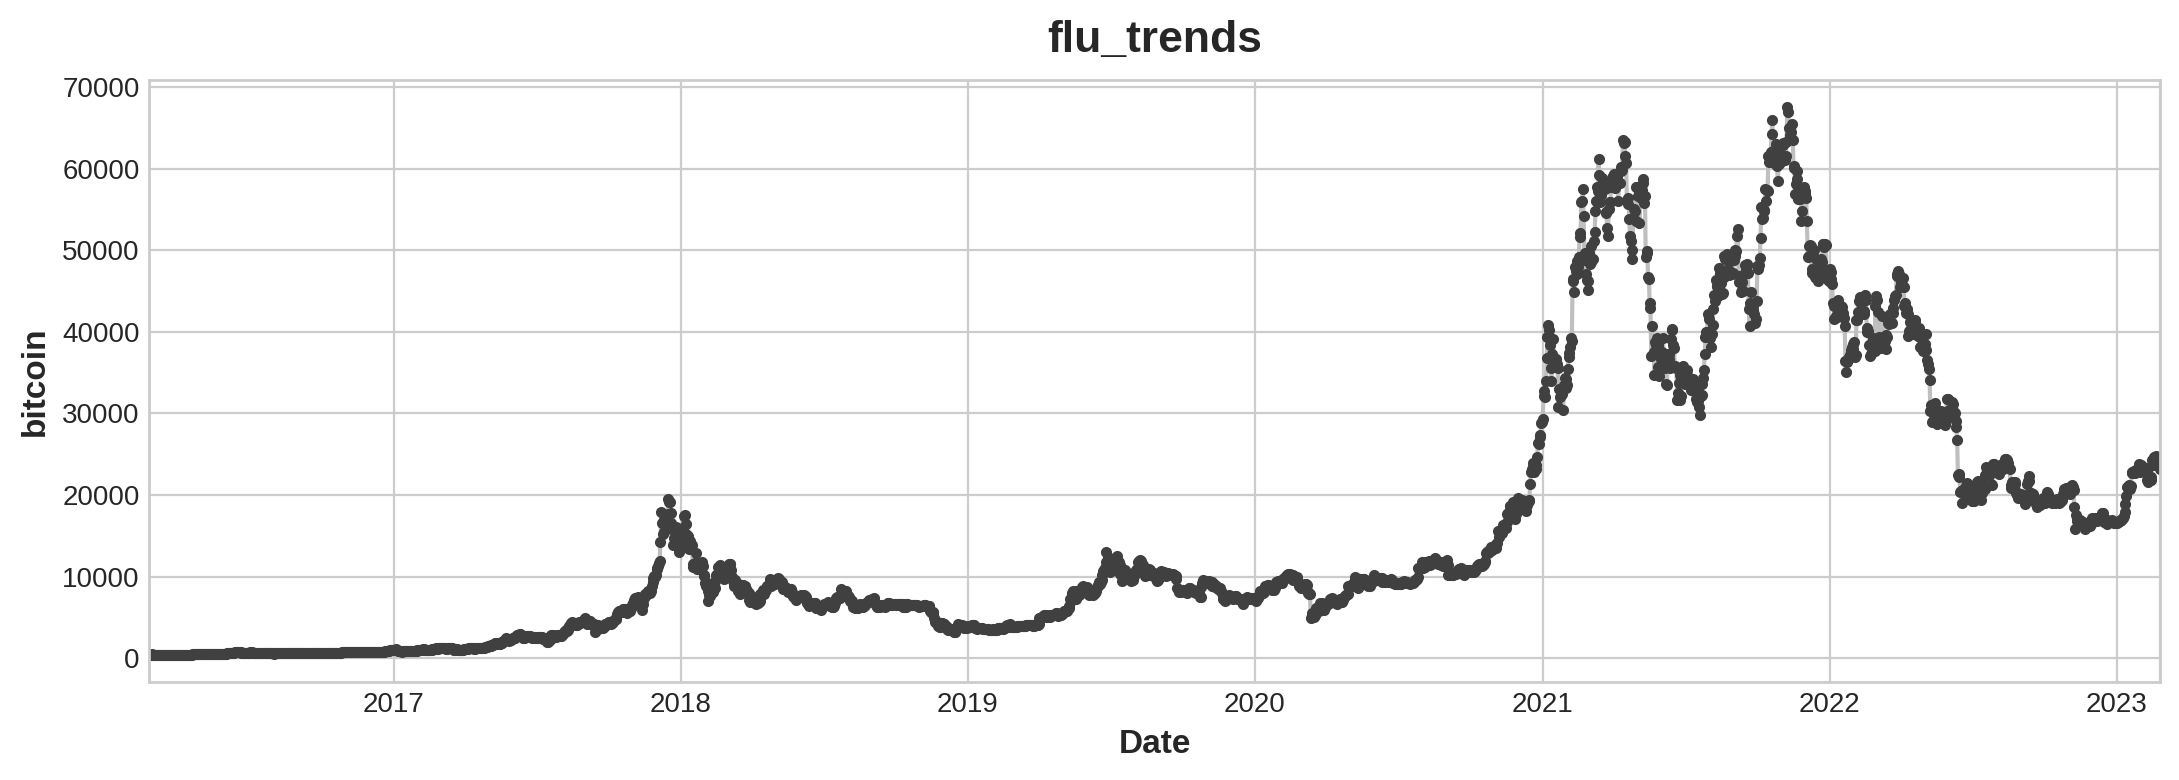

In [521]:
ax = G['Close'].plot(title="flu_trends", **plot_params)
_=ax.set(ylabel="bitcoin")

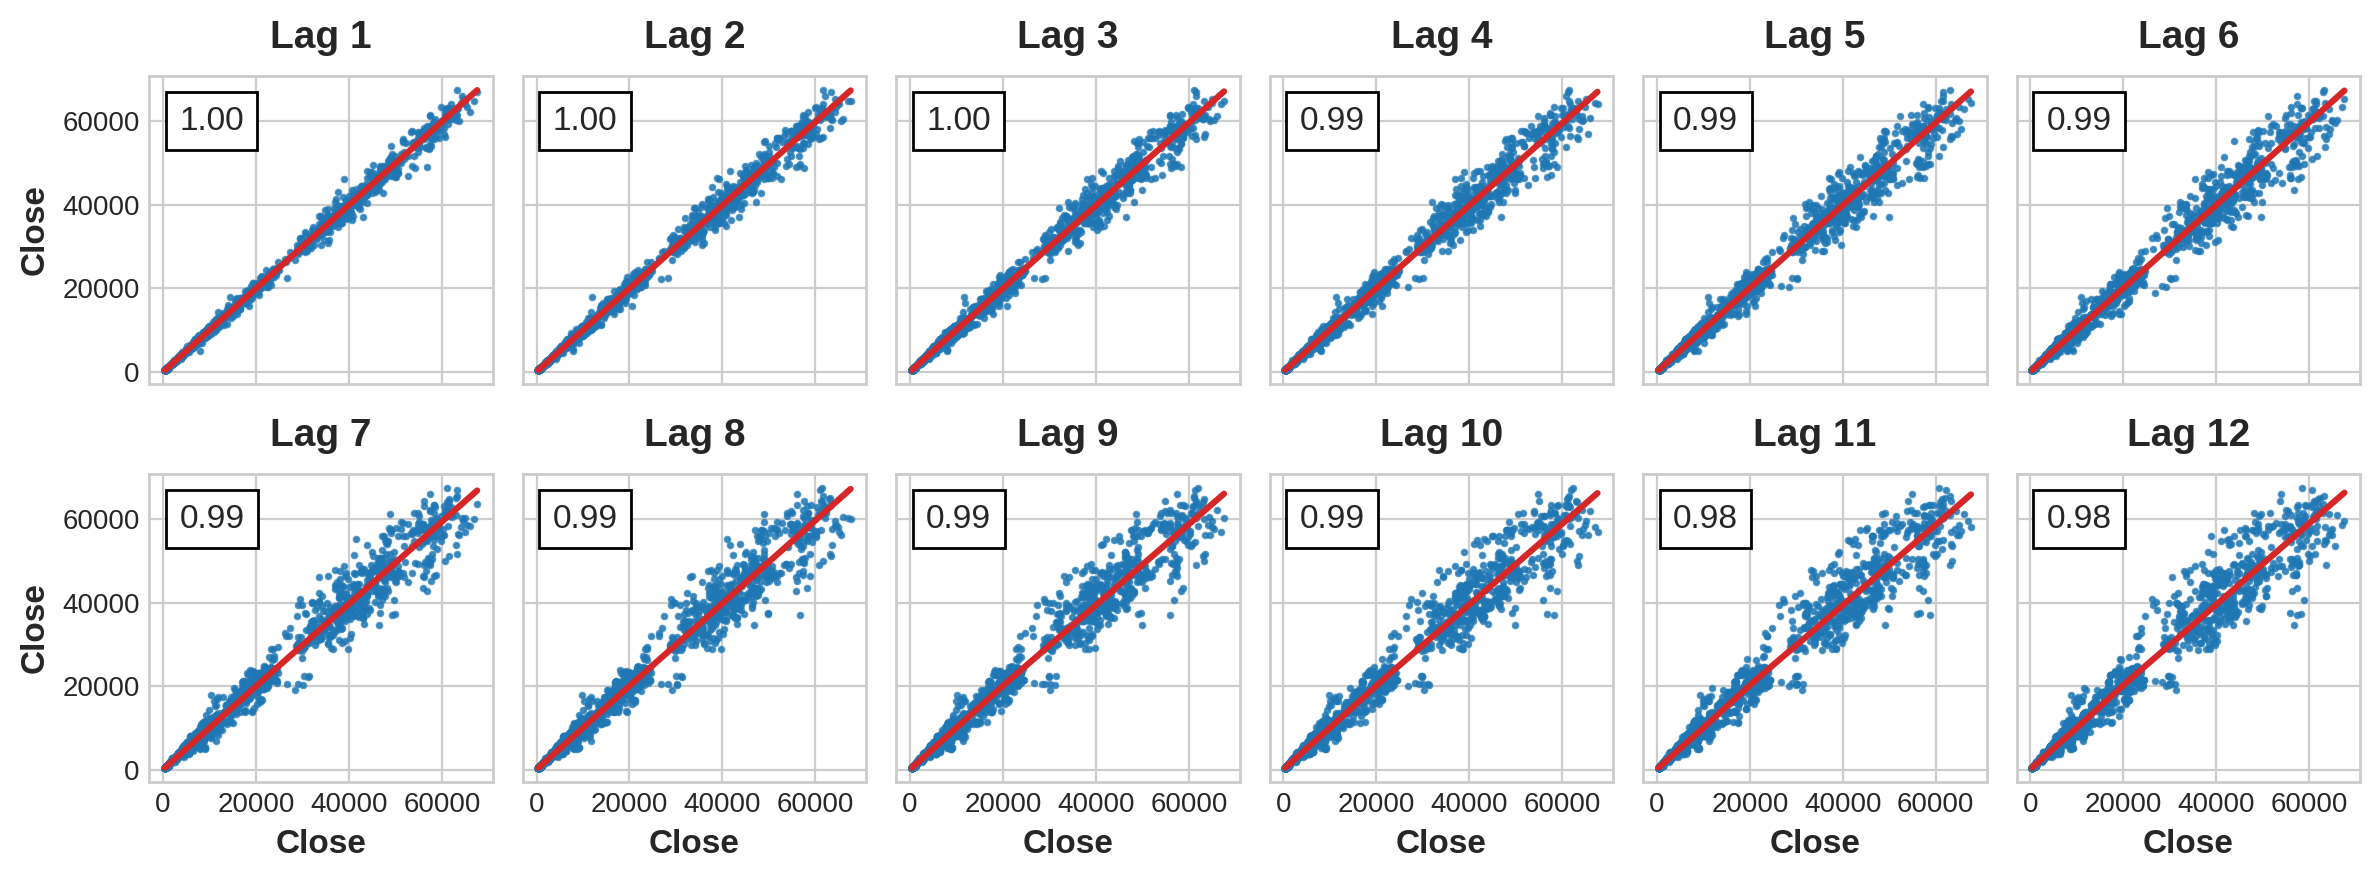

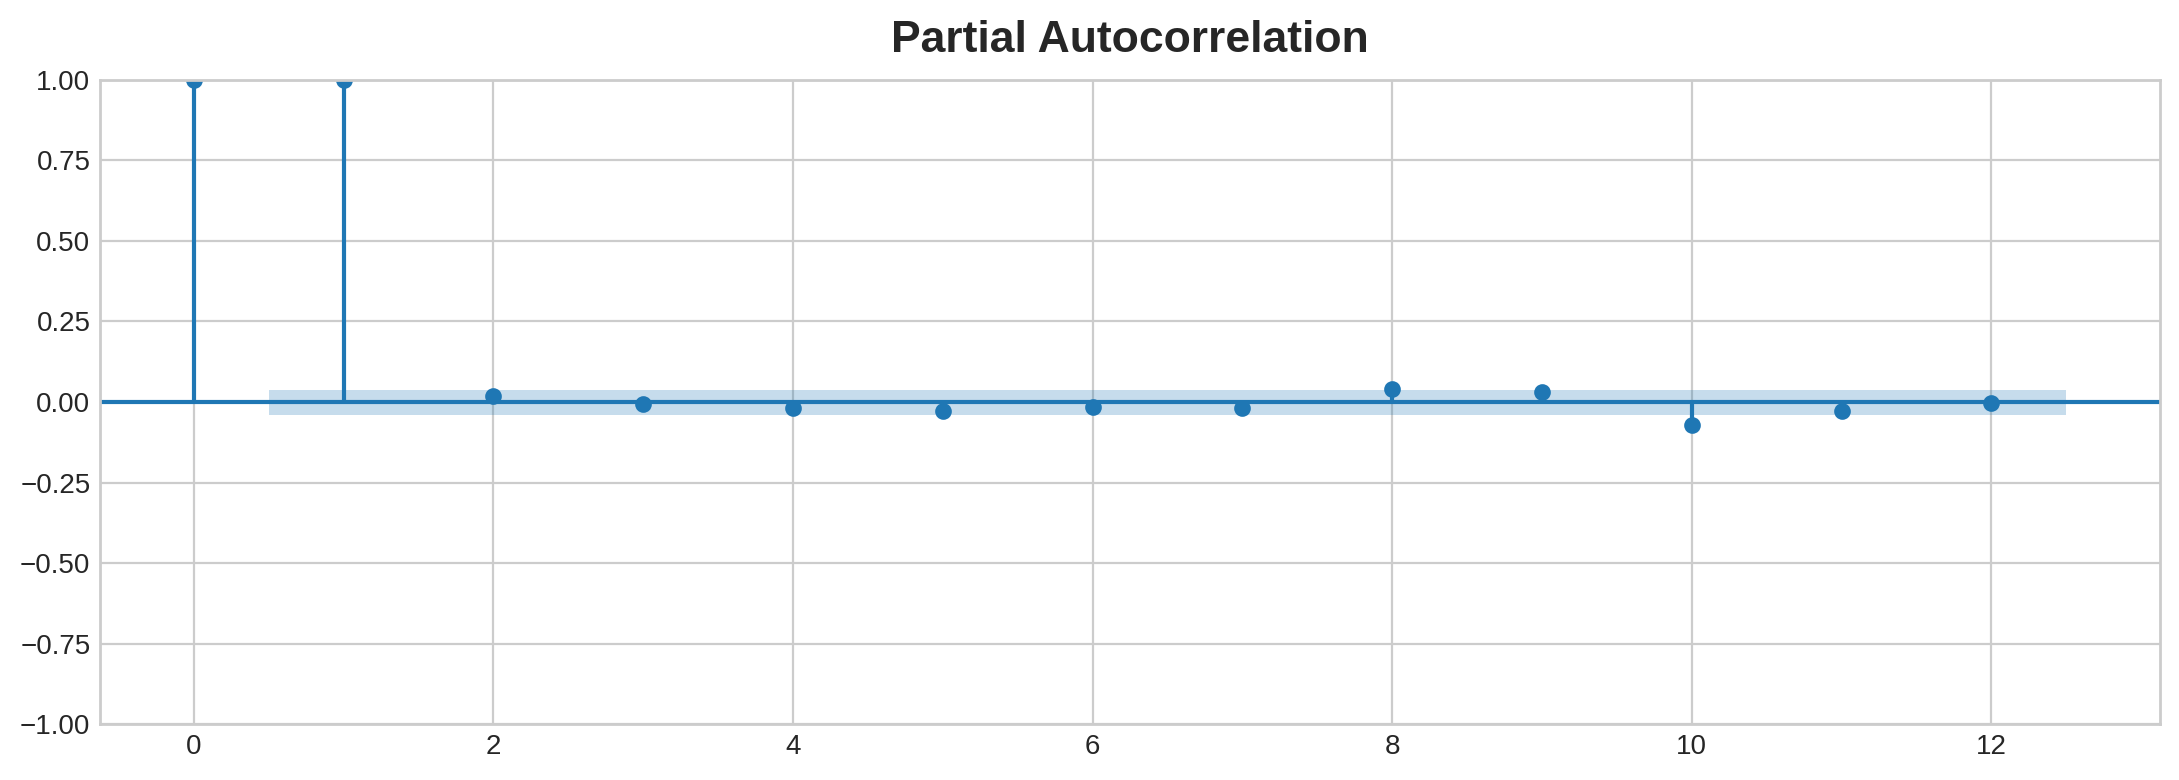

In [522]:
_ = plot_lags(G["Close"], lags=12, nrows=2)
_ = plot_pacf(G["Close"], lags=12)

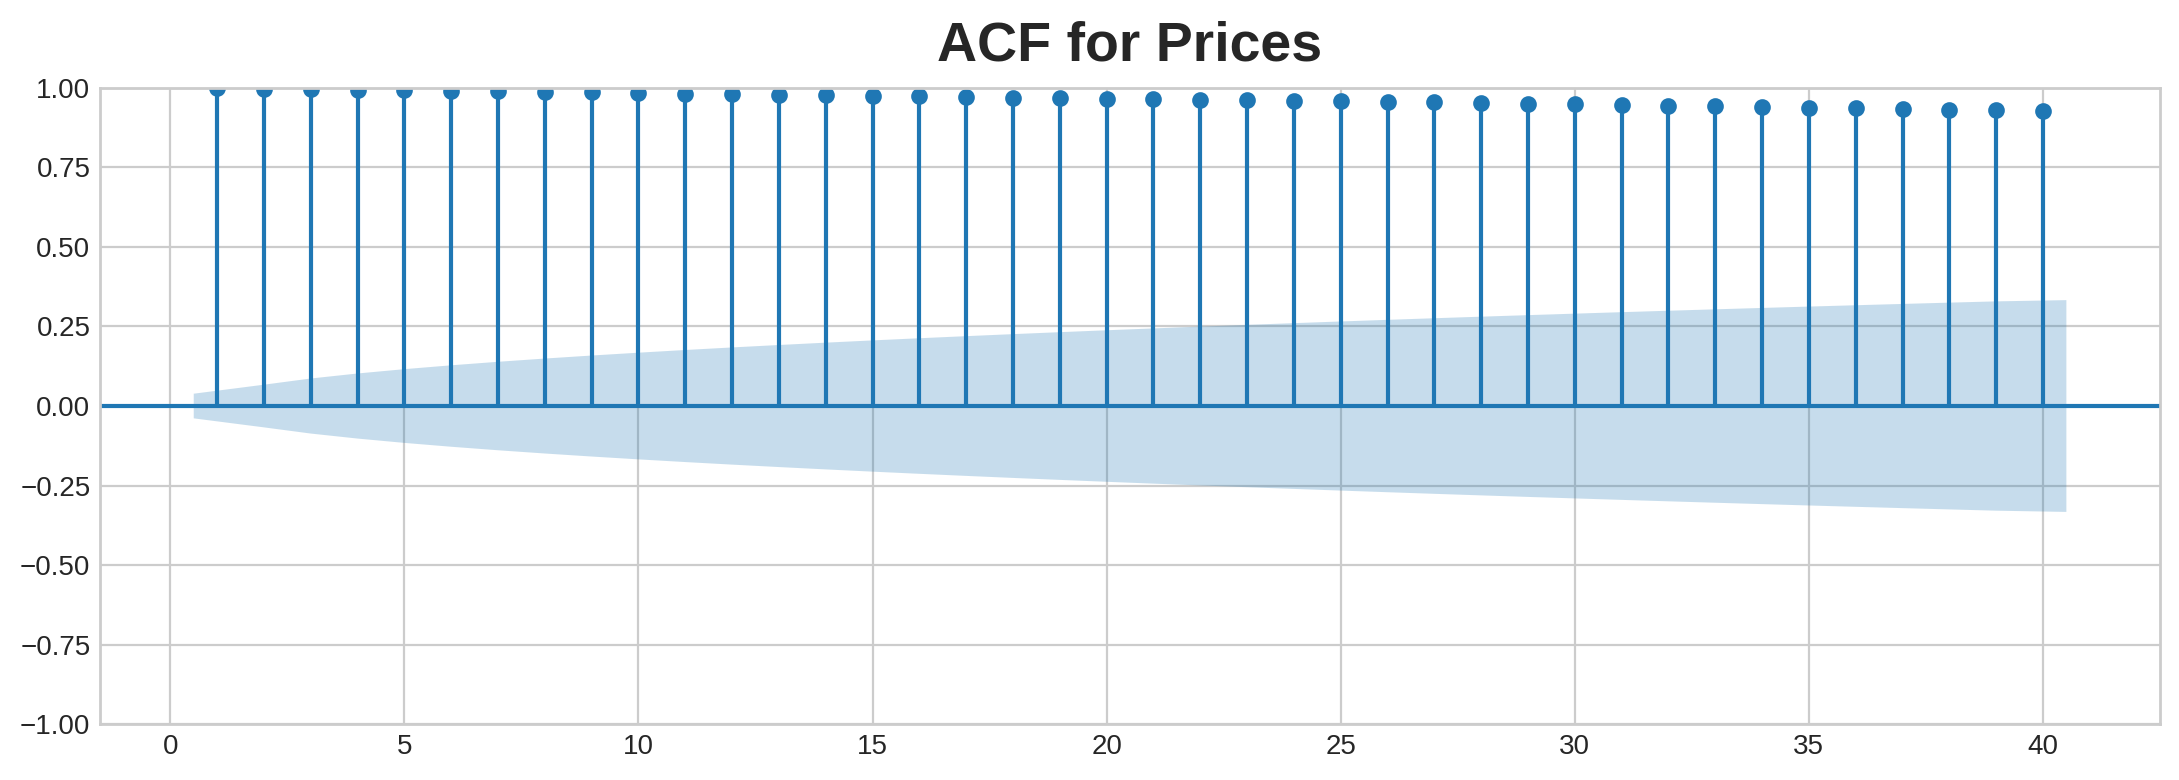

In [523]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(G['Close'], zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

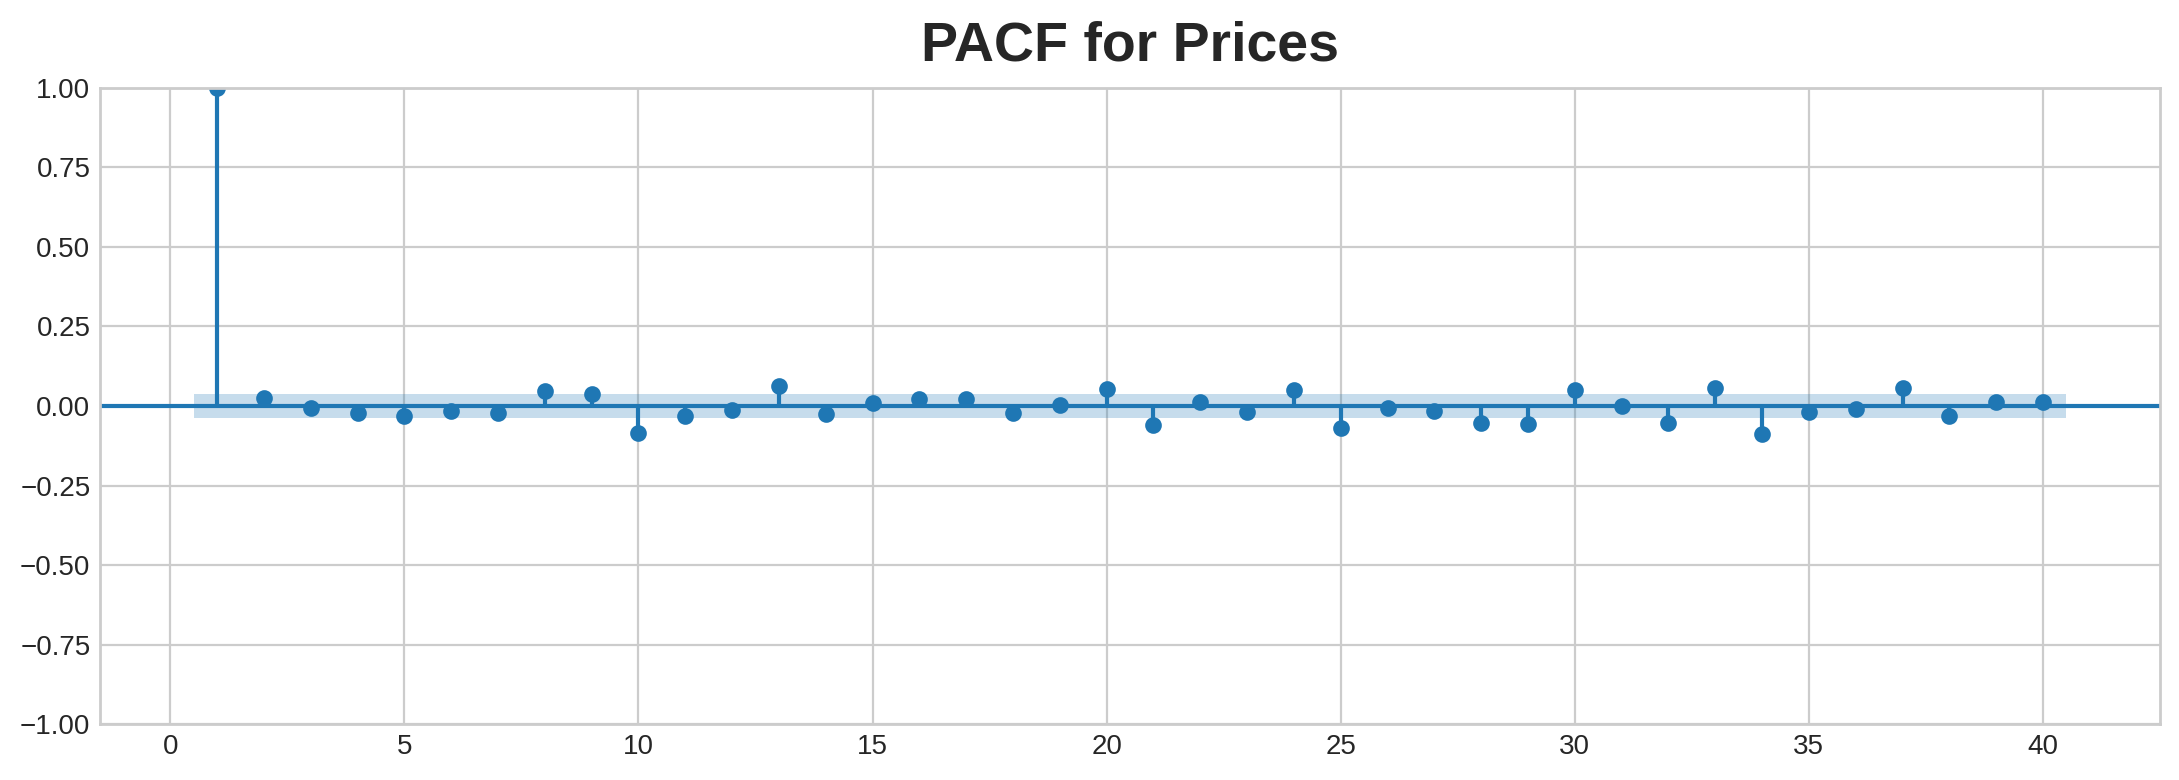

In [524]:
sgt.plot_pacf(G['Close'], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## Definimos los retornos

In [525]:
def make_lags(ts, lags):
  return pd.concat(
      {
          f'y_lag_{i}':ts.shift(i)
          for i in range(1, lags + 1)
      },
      axis=1
      )


In [526]:
L = make_lags(G.Close, lags=1)
L=L.fillna(0.0)

# prediccion con retornos



In [527]:
yy = G.Close
x_train, x_test, y_train, y_test = train_test_split(L, yy, test_size=60, shuffle=False)

In [528]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = pd.Series(model.predict(x_train), index=y_train.index)
y_fore = pd.Series(model.predict(x_test), index=y_test.index)

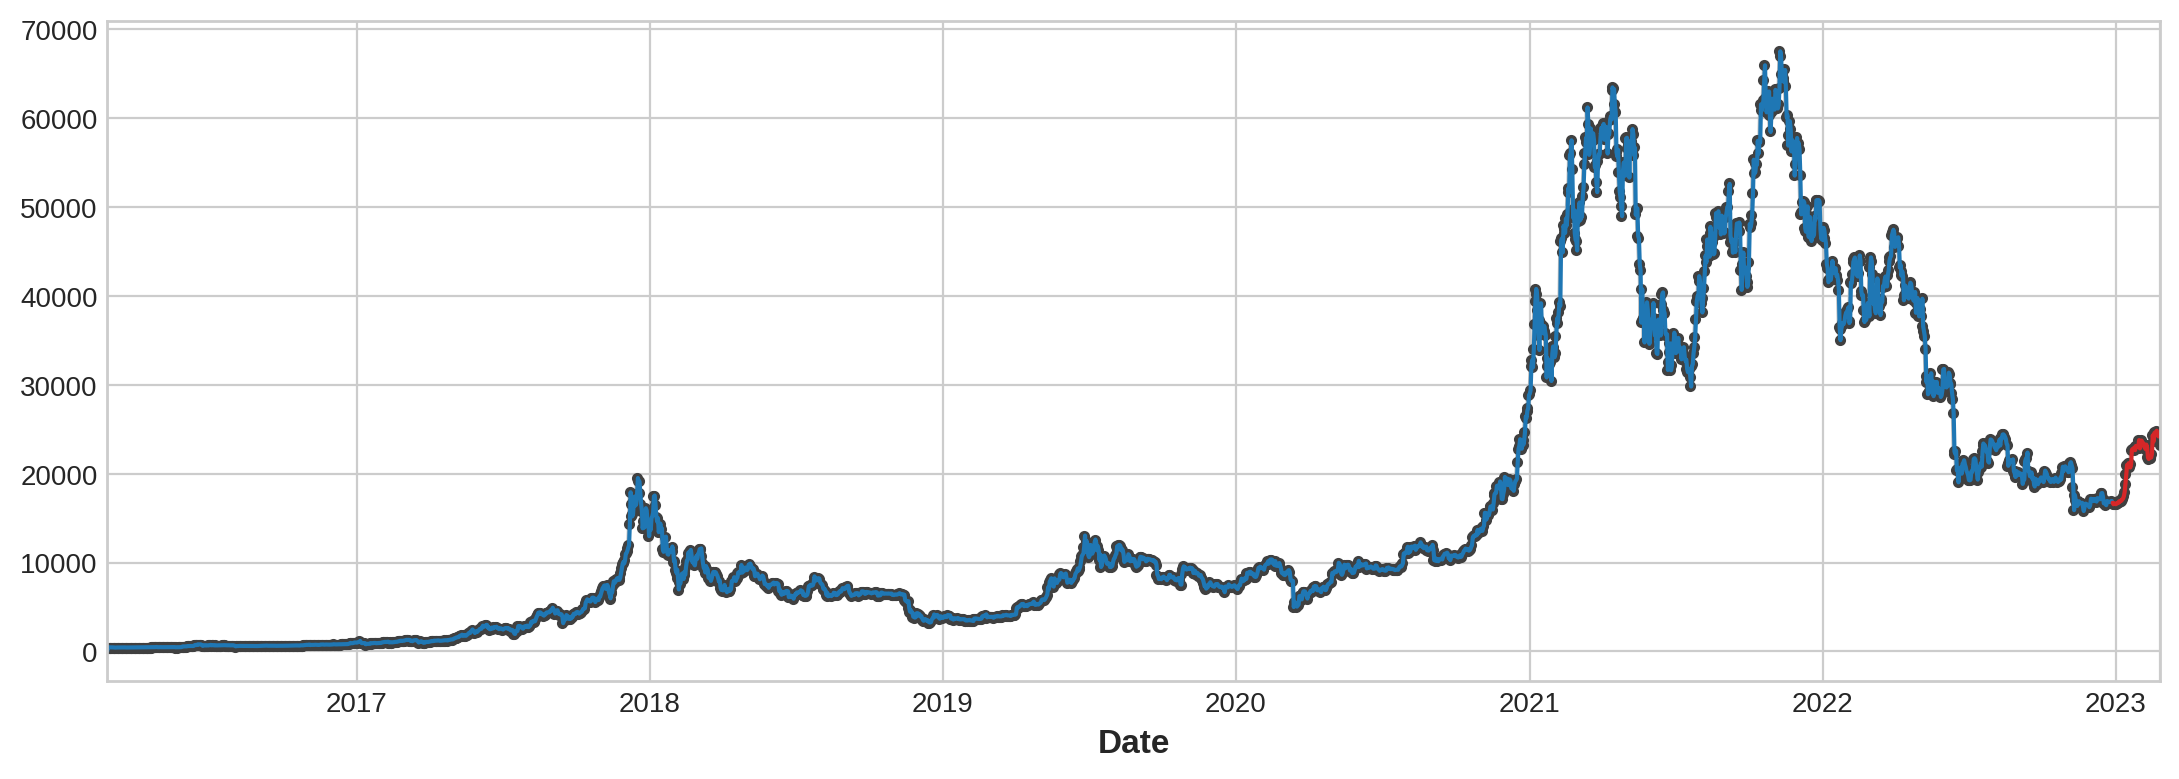

In [529]:
## grafica de la prediccion
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

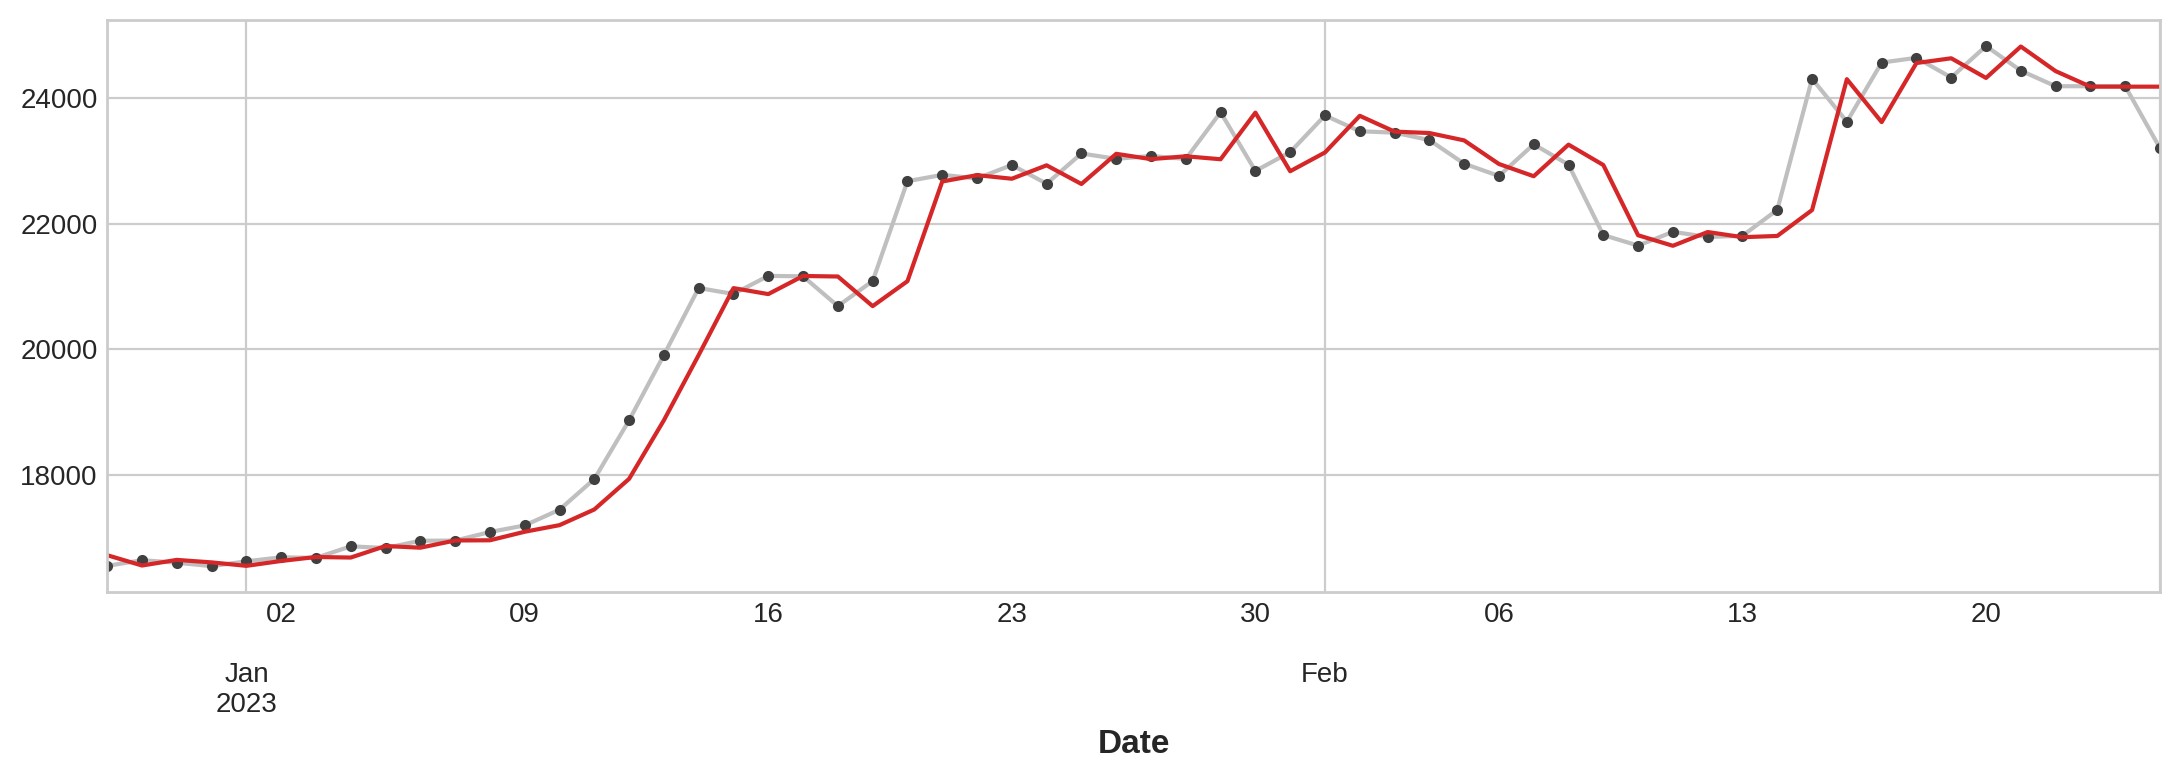

In [530]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

# Modelos hibridos

In [531]:
#from pathlib import path

data_dir = "https://raw.githubusercontent.com/Eduarram/time_series-/main1/proyecto%20netflix/BTC-USD.csv"
historic = ["Open", "High", "Low", "Close"]
bitcoin = pd.read_csv(data_dir,
                      usecols= ['Date']+ historic,
                      parse_dates = ['Date'],
                      index_col = 'Date').to_period('D').reindex(columns = historic)



bitcoin = pd.concat({'historic': bitcoin}, names=[None, "Prices"], axis = 1)

bitcoin.head()


historic                                    
Prices            Open        High         Low       Close
Date                                                      
2016-02-25  425.036987  427.718994  420.415009  424.544006
2016-02-26  424.628998  432.152008  421.619995  432.152008
2016-02-27  432.838989  434.230988  428.102997  432.519012
2016-02-28  432.571014  435.683014  423.820007  433.503998
2016-02-29  433.437988  441.506989  431.692993  437.696991

In [532]:
 bitcoin = bitcoin.fillna(method='bfill')
 bitcoin.isna().sum()

          Prices
historic  Open      0
          High      0
          Low       0
          Close     0
dtype: int64

diseñando el modelo hibrido

In [533]:
# Create feature trends
y= bitcoin.copy()
dp = DeterministicProcess(
    index=y.index,  # dates from the training data
    constant=True,  # the intercept
    order=2,        # quadratic trend
    drop=False,)    # drop terms to avoid collinearity
X = dp.in_sample() #features for training


In [534]:
print((len(y.index), len(X.index)))

(2558, 2558)


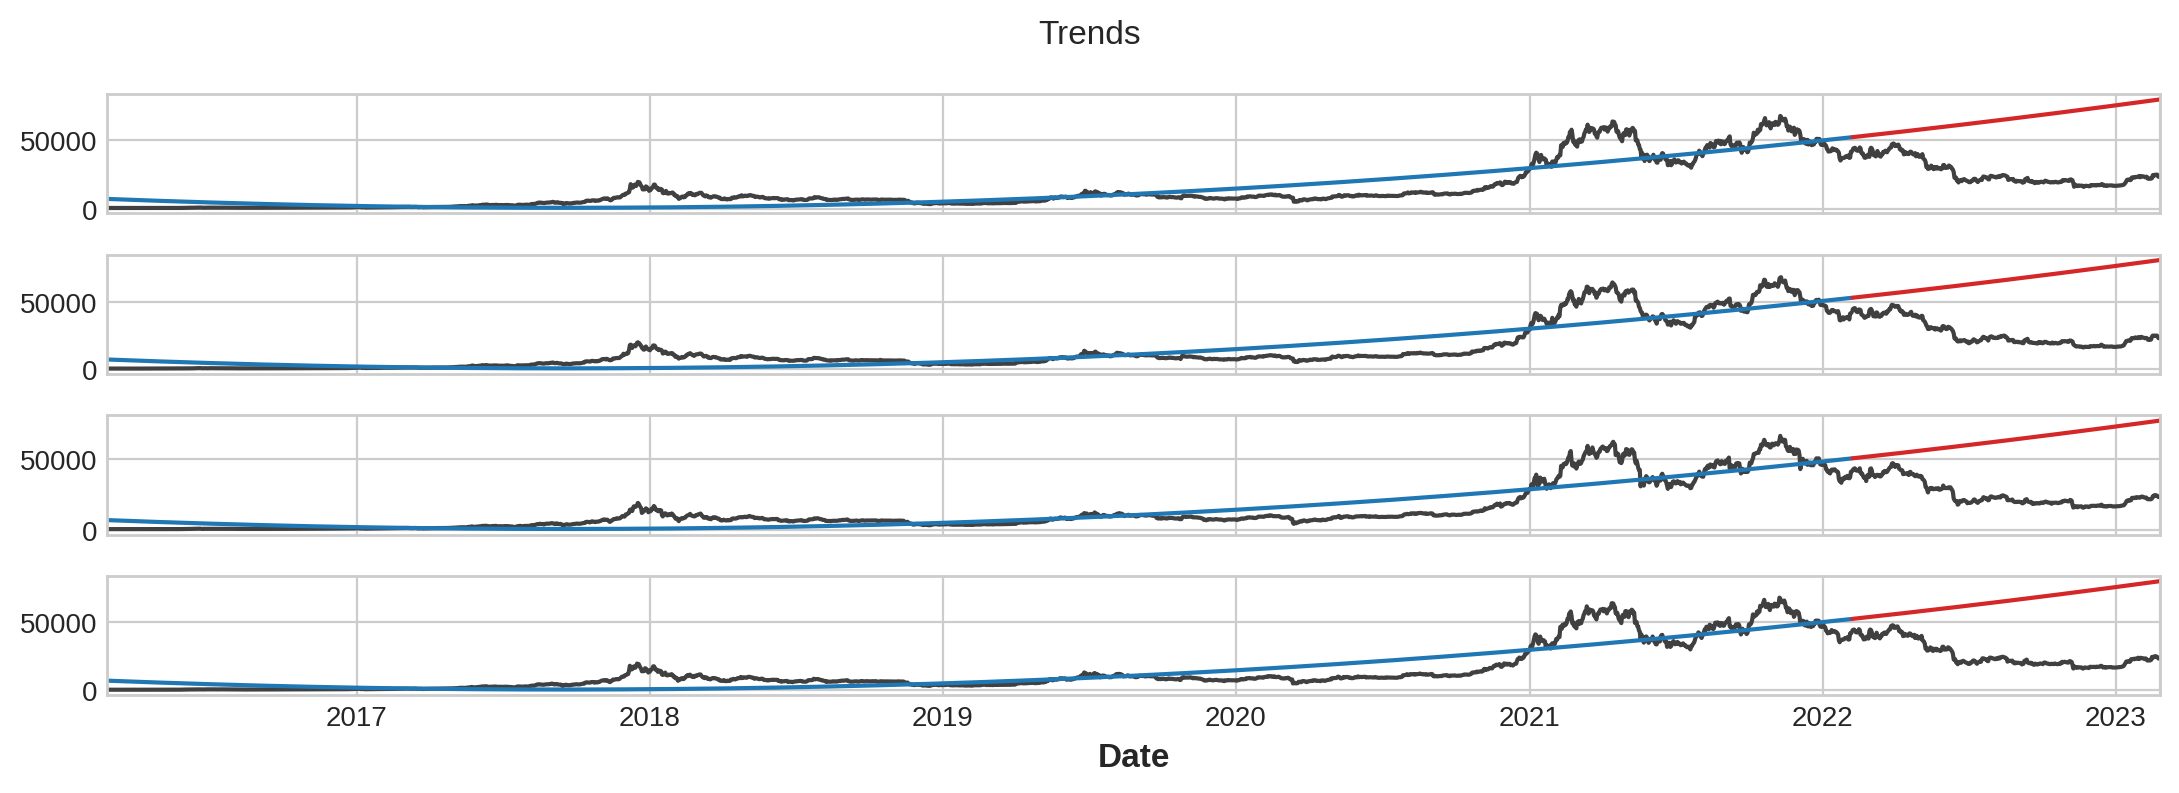

In [535]:
size=int(len(y.index)*0.85)
X_train, X_test = X.iloc[:size], X.iloc[size:]
y_train, y_test = y.iloc[:size], y.iloc[size:]

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_fit = pd.DataFrame(
    model.predict(X_train),
    index=y_train.index,
    columns=y_train.columns,
)
y_pred = pd.DataFrame(
    model.predict(X_test),
    index=y_test.index,
    columns=y_test.columns,
)


# Plot
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Trends")

# Pronostico con Xgboost
- un dato importante es que XGboost si puede reconocer entre varias series



In [536]:
# reset index
X=bitcoin.stack()
display(X.head())
y = X.pop('historic')

historic
Date       Prices            
2016-02-25 Open    425.036987
           High    427.718994
           Low     420.415009
           Close   424.544006
2016-02-26 Open    424.628998

In [537]:
X.head()


Empty DataFrame
Columns: []
Index: [(2016-02-25, Open), (2016-02-25, High), (2016-02-25, Low), (2016-02-25, Close), (2016-02-26, Open)]

In [538]:

X = X.reset_index('Prices')
for colname in X.select_dtypes(["object", "category"]):
    X[colname], _ = X[colname].factorize()
X.head()

Prices
Date              
2016-02-25       0
2016-02-25       1
2016-02-25       2
2016-02-25       3
2016-02-26       0

In [539]:
X['Date'] = X.index.day

size2=size*4

X_train, X_test = X.iloc[:size2], X.iloc[size2:]
y_train, y_test = y.iloc[:size2], y.iloc[size2:]



In [549]:
y_train

Date        Prices
2016-02-25  Open        425.036987
            High        427.718994
            Low         420.415009
            Close       424.544006
2016-02-26  Open        424.628998
                          ...     
2022-02-05  Close     41441.164063
2022-02-06  Open      41441.121094
            High      42500.785156
            Low       41244.906250
            Close     42412.433594
Name: historic, Length: 8696, dtype: float64

# prediccion con Xgboost.


In [540]:
y_fit = y_fit.stack().squeeze()
y_pred = y_pred.stack().squeeze()

y_resid = y_train-y_fit




In [544]:
  xgb = XGBRegressor()
  xgb.fit(X_train, y_resid)
  y_fit_boosted = xgb.predict(X_train) + y_fit
  y_pred_boosted = xgb.predict(X_test) + y_pred


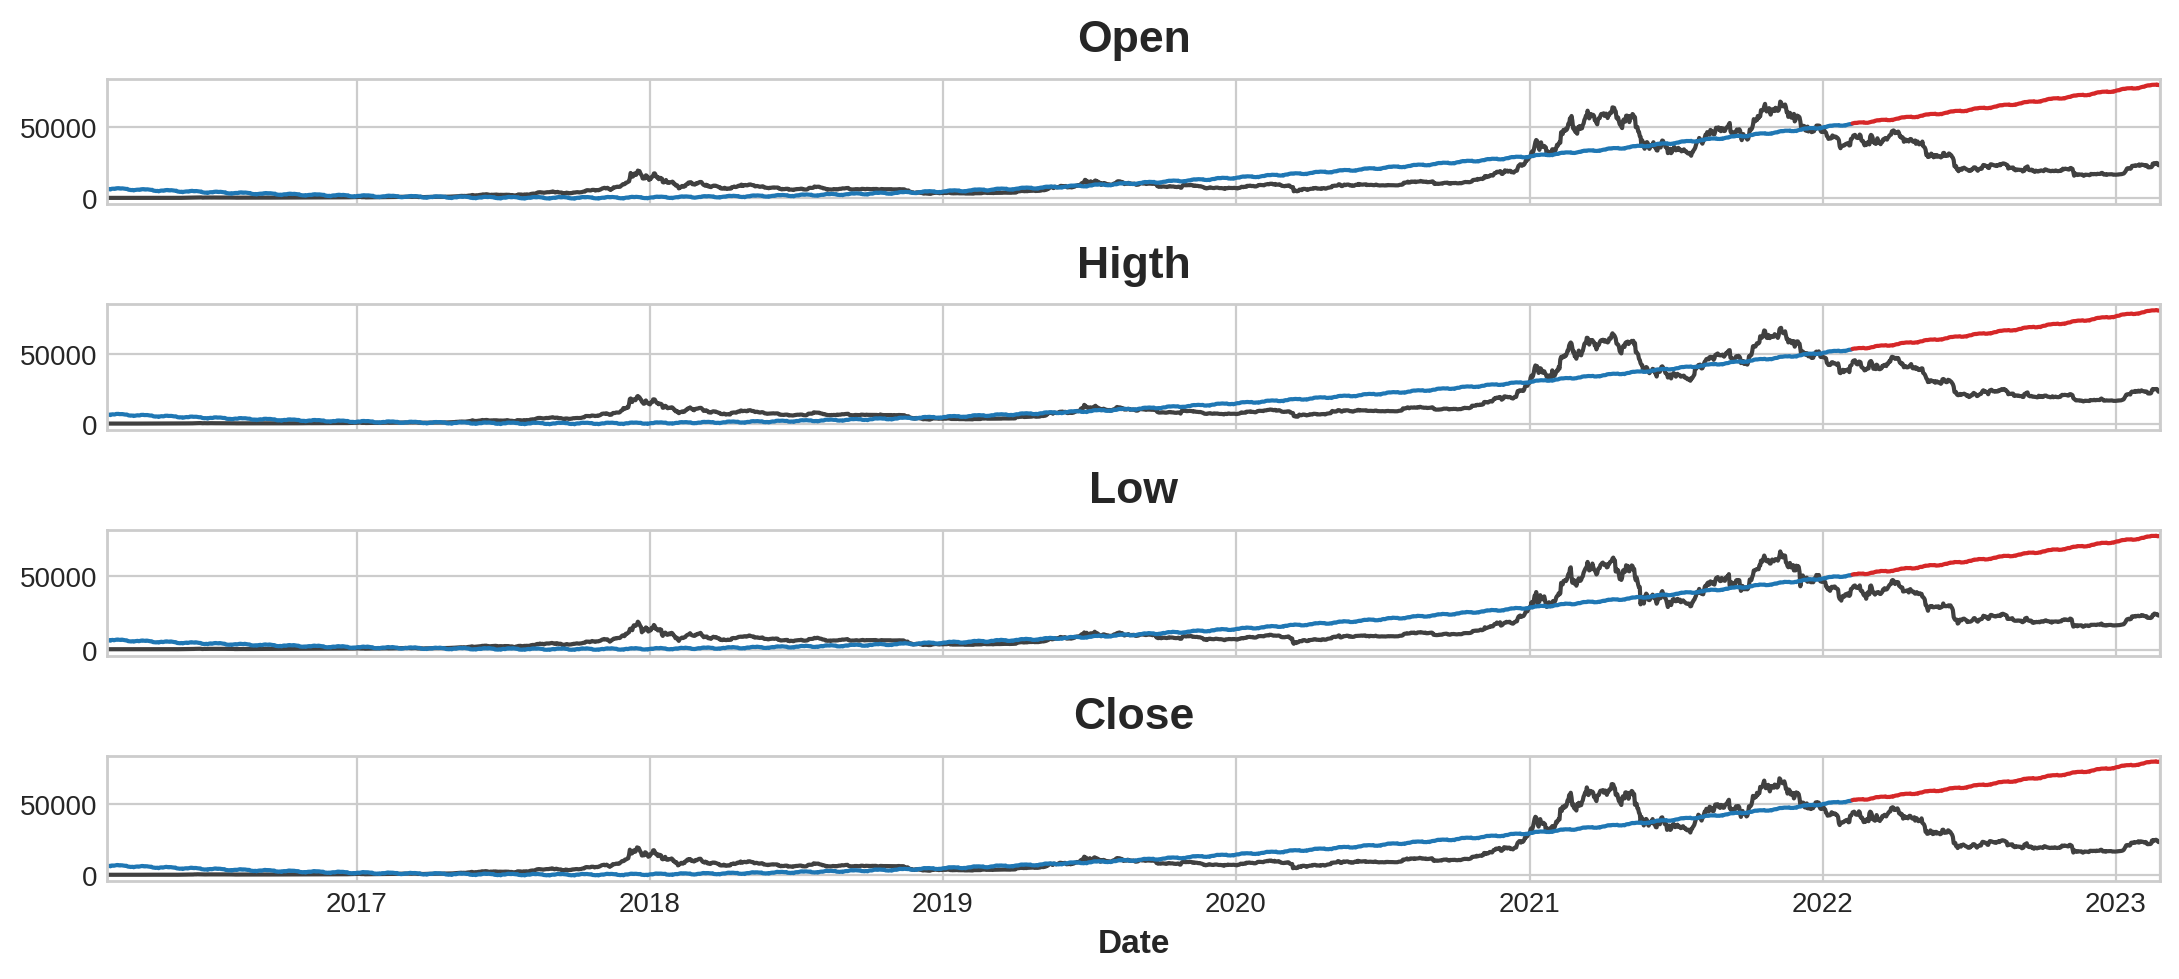

In [546]:
axs = y_train.unstack(['Prices']).plot(
    color='0.25', figsize=(11, 5), subplots=True, sharex=True,
    title=['Open', 'Higth', 'Low', 'Close'],
)
axs = y_test.unstack(['Prices']).plot(
    color='0.25', subplots=True, sharex=True, ax=axs,
)
axs = y_fit_boosted.unstack(['Prices']).plot(
    color='C0', subplots=True, sharex=True, ax=axs,
)
axs = y_pred_boosted.unstack(['Prices']).plot(
    color='C3', subplots=True, sharex=True, ax=axs,
)
for ax in axs: ax.legend([])